<a href="https://www.kaggle.com/code/gautamnaik1994/netflix-case-study?scriptVersionId=151303626" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <a id='toc1_'></a>[Netflix Case Study](#toc0_)

By Gautam Naik (gautamnaik1994@gmail.com)

Google Collab Link: https://colab.research.google.com/github/gautamnaik1994/NetflixDataAnalysisCaseStudy/blob/main/CaseStudy.ipynb  
Github Repo Link: https://github.com/gautamnaik1994/NetflixDataAnalysisCaseStudy  
Github Pages Link: https://gautamnaik1994.github.io/NetflixDataAnalysisCaseStudy/

**Business Problem**
- Help Netflix in deciding which type of shows/movies to produce 
- How to grow the business in different countries

**Metric**
- Since there is not data about views count, user star rating we are going to use the count of content added to Netflix as the metric.
- We will also use the count of cast, director, rating as measure of popularity.

**Table of contents**<a id='toc0_'></a>    
- [Netflix Case Study](#toc1_)    
  - [Data Cleaning and Splitting](#toc1_1_)    
    - [Separating nested data](#toc1_1_1_)    
    - [Adding date related columns](#toc1_1_2_)    
    - [Exporting data to separate files](#toc1_1_3_)    
  - [EDA and Insights](#toc1_2_)    
    - [Country Analysis](#toc1_2_1_)    
    - [Cast Analysis](#toc1_2_2_)    
    - [Genre Analysis](#toc1_2_3_)    
      - [Movie Genre Analysis](#toc1_2_3_1_)    
      - [TV Show Genre Analysis](#toc1_2_3_2_)    
    - [Director Analysis](#toc1_2_4_)    
    - [Release Timeline Analysis](#toc1_2_5_)    
      - [Analysis of all time data](#toc1_2_5_1_)    
      - [Analysis of latest data](#toc1_2_5_2_)    
    - [Movie and TV Show Distribution Analysis](#toc1_2_6_)    
      - [TV Show popularity analysis](#toc1_2_6_1_)    
    - [Rating Analyisis](#toc1_2_7_)    
    - [Duration Anaylsis](#toc1_2_8_)    
      - [TV Show Analysis](#toc1_2_8_1_)    
      - [Movie Analysis](#toc1_2_8_2_)    
  - [Recommendations](#toc1_3_)    
    - [General Recommendations](#toc1_3_1_)    
    - [Content Recommendations](#toc1_3_2_)    
      - [Top genres for each country](#toc1_3_2_1_)    
      - [Top rated content for each country](#toc1_3_2_2_)    
      - [Top cast in each country](#toc1_3_2_3_)    
      - [Top directors in each country](#toc1_3_2_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
!pip install duckdb

  Obtaining dependency information for duckdb from https://files.pythonhosted.org/packages/7c/d5/7688cdc1b57c9ada17b6f6143a923606294b462e4b15e3ac249c04649bde/duckdb-0.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 45.6 MB/s eta 0:00:0000:0100:01


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-data/netflix.csv
/kaggle/input/netflix-data/movies.csv
/kaggle/input/netflix-data/tv_shows.csv
/kaggle/input/netflix-data/cast.csv
/kaggle/input/netflix-data/listed.csv
/kaggle/input/netflix-data/country.csv
/kaggle/input/netflix-data/data.csv
/kaggle/input/netflix-data/director.csv


In [3]:
import pandas as pd
import numpy as np
import duckdb
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import datetime
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set_style('darkgrid')
pd.reset_option('display.max_rows')

## <a id='toc1_1_'></a>[Data Cleaning and Splitting](#toc0_)

In [4]:
df=pd.read_csv('../input/netflix-data/netflix.csv')
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4179,s4180,TV Show,Memory Love,NaN,"Andy Chen, Mandy Wei, Jolin Chien, Mandy Tao, ...",NaN,"January 18, 2019",2017,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Losing her memory – and her boyfriend – after ...
133,s134,Movie,Chappie,Neill Blomkamp,"Sharlto Copley, Hugh Jackman, Sigourney Weaver...","South Africa, United States","September 1, 2021",2015,R,121 min,"Action & Adventure, Sci-Fi & Fantasy",In a futuristic society where an indestructibl...
8372,s8373,Movie,The Jane Austen Book Club,Robin Swicord,"Maria Bello, Emily Blunt, Kathy Baker, Amy Bre...",United States,"March 8, 2019",2007,PG-13,106 min,"Comedies, Dramas, Romantic Movies",Six book club members find their lives resembl...
6235,s6236,Movie,Barbie in A Mermaid Tale,Adam Wood,"Kelly Sheridan, Kathleen Barr, Tabitha St. Ger...",United States,"October 1, 2017",2010,TV-Y,74 min,Children & Family Movies,Surf champ Merliah discovers she's actually a ...
1859,s1860,Movie,Octonauts & the Great Barrier Reef,Blair Simmons,"Simon Greenall, Rob Rackstraw, Jo Wyatt, Paul ...",United Kingdom,"October 13, 2020",2020,TV-Y,47 min,Children & Family Movies,"In this musical special, the Octonauts must fi..."
8592,s8593,TV Show,Timeless Season,NaN,"Loo Aye Keng, Chen Ke Mei, Hady, Hishiko Woo, ...",NaN,"September 18, 2017",2009,TV-14,1 Season,"International TV Shows, TV Dramas","A decade after college, a wake reunites five f..."
6471,s6472,Movie,Chingo Bling: They Can't Deport Us All,Luis Lopez,Chingo Bling,NaN,"June 1, 2017",2017,TV-MA,63 min,Stand-Up Comedy,"On point and larger than life, rapper and stan..."
5999,s6000,Movie,20th Century Women,Mike Mills,"Annette Bening, Elle Fanning, Greta Gerwig, Lu...",United States,"June 28, 2019",2016,R,119 min,"Dramas, Independent Movies","In 1979, single bohemian mom Dorothea, hoping ..."
4211,s4212,Movie,Nang Nak,Nonzee Nimibutr,"Inthira Charoenpura, Winai Kraibutr",Thailand,"January 5, 2019",1999,TV-MA,101 min,"Horror Movies, International Movies, Romantic ...","In this adaptation of a Thai folk tale, a man ..."
2356,s2357,Movie,Feel the Beat,Elissa Down,"Sofia Carson, Wolfgang Novogratz, Donna Lynne ...",United States,"June 19, 2020",2020,TV-G,110 min,"Children & Family Movies, Comedies, Dramas","After blowing a Broadway audition, a self-cent..."


In [5]:
df = df.drop(["description","title"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [6]:
df.isna().sum()

show_id            0
type               0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [7]:
df["type"].value_counts()
df["rating"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [8]:
df["type"]=df["type"].astype("category")
mask=df["rating"].isin(["74 min","84 min","66 min"])
df.loc[mask, "duration"] = df.loc[mask, "rating"]
df.loc[mask, "rating"] = df["rating"].mode().iloc[0]
df["rating"]=df["rating"].fillna(df["rating"].mode().iloc[0])
df["date_added"] = pd.to_datetime(df["date_added"] , format='%B %d, %Y', errors="coerce")
mask=df["date_added"].isna()
df.loc[mask, "date_added"] = df.loc[mask, "release_year"].apply(lambda x: max(pd.to_datetime(x + 1, format="%Y"), pd.Timestamp(datetime.date(2006, 1, 1))).date() )

In [9]:
# df.set_index('show_id')['cast'].str.split(', ', expand=True).stack().reset_index(name='cast').drop('level_1', axis=1)

### <a id='toc1_1_1_'></a>[Separating nested data](#toc0_)

In [10]:
cast=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
cast_df=pd.DataFrame(cast,index=df['show_id'])
cast_df=cast_df.stack().reset_index(name='cast').drop('level_1', axis=1).set_index('show_id')
cast_df.replace("nan", float('nan'), inplace=True)
# mask = cast_df[cast_df['cast'] == ''].index
# cast_df.drop(mask, inplace=True)
# cast_df

director=df['director'].apply(lambda x: str(x).split(', ')).tolist()
director_df=pd.DataFrame(director,index=df['show_id'])
director_df=director_df.stack().reset_index(name='director').drop('level_1', axis=1).set_index('show_id')
director_df.replace("nan", float('nan'), inplace=True)
# director_df

country=df['country'].apply(lambda x: str(x).split(', ')).tolist()
country_df=pd.DataFrame(country,index=df['show_id'])
country_df=country_df.stack().reset_index(name='country').drop('level_1', axis=1).set_index('show_id')
country_df.replace("nan", float('nan'), inplace=True)
mask = country_df[country_df['country'] == ''].index
country_df.drop(mask, inplace=True)
# country_df.replace(" ", float('nan'), inplace=True)
# country_df

listed=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
listed_df=pd.DataFrame(listed,index=df['show_id'])
listed_df=listed_df.stack().reset_index(name='listed_in').drop('level_1', axis=1).set_index('show_id')
listed_df.replace("nan", float('nan'), inplace=True)
# listed_df
df.drop(["cast","country","director","listed_in"], axis=1, inplace=True)

### <a id='toc1_1_2_'></a>[Adding date related columns](#toc0_)

In [11]:
df["duration"]=df["duration"].apply(lambda x: x.split(" ")[0])
df["date_added_year_month"] = df["date_added"].dt.strftime('%Y-%m')
df["date_added_year"]=df["date_added"].dt.year
df["date_added_month"]=df["date_added"].dt.month
df["date_added_month_name"]=df["date_added"].dt.month_name()
df["dat_added_period"]=pd.cut(df["date_added_year"], bins=[0,2005, 2010, 2015,2022 ], labels=["2005","2006-2010","2011-2015","2016-2022"])

movies_df=df.loc[df["type"]=="Movie"]
tv_shows_df=df.loc[df["type"]=="TV Show"]
movies_df.head()
tv_shows_df.head()

,show_id,type,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,dat_added_period
0,s1,Movie,2021-09-25,2020,PG-13,90,2021-09,2021,9,September,2016-2022
6,s7,Movie,2021-09-24,2021,PG,91,2021-09,2021,9,September,2016-2022
7,s8,Movie,2021-09-24,1993,TV-MA,125,2021-09,2021,9,September,2016-2022
9,s10,Movie,2021-09-24,2021,PG-13,104,2021-09,2021,9,September,2016-2022
12,s13,Movie,2021-09-23,2021,TV-MA,127,2021-09,2021,9,September,2016-2022


,show_id,type,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,dat_added_period
1,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022
2,s3,TV Show,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,2016-2022
3,s4,TV Show,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,2016-2022
4,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022
5,s6,TV Show,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,2016-2022


In [12]:
country_df.value_counts()
cast_df.value_counts()
director_df.value_counts()

country       
United States     3689
India             1046
United Kingdom     804
Canada             445
France             392
                  ... 
Kazakhstan           1
Jamaica              1
Slovakia             1
Ethiopia             1
Afghanistan          1
Name: count, Length: 126, dtype: int64

cast               
Anupam Kher            43
Shah Rukh Khan         35
Julie Tejwani          33
Naseeruddin Shah       32
Takahiro Sakurai       32
                       ..
Chinmay Kambli          1
Kumiko Aso              1
Kumarakom Vasudevan     1
Kumar Varun             1
Ṣọpẹ́ Dìrísù            1
Name: count, Length: 36439, dtype: int64

director               
Rajiv Chilaka              22
Jan Suter                  21
Raúl Campos                19
Suhas Kadav                16
Marcus Raboy               16
                           ..
Brandon Camp                1
Juan Antin                  1
Juan Antonio de la Riva     1
Juan Camilo Pinzon          1
María Jose Cuevas           1
Name: count, Length: 4993, dtype: int64

In [13]:
country_df["country"].mode().iloc[0]

'United States'

In [14]:
director_df.fillna("Unknown", inplace=True)
cast_df.fillna("Unknown", inplace=True)
country_df=country_df.fillna('Unknown')

In [15]:
country_df.reset_index(inplace=True)
cast_df.reset_index(inplace=True)
listed_df.reset_index(inplace=True)
director_df.reset_index(inplace=True)

In [16]:
country_df.isna().sum()
director_df.isna().sum()
listed_df.isna().sum()
tv_shows_df.isna().sum()
movies_df.isna().sum()
df.isna().sum()
cast_df.isna().sum()

show_id    0
country    0
dtype: int64

show_id     0
director    0
dtype: int64

show_id      0
listed_in    0
dtype: int64

show_id                  0
type                     0
date_added               0
release_year             0
rating                   0
duration                 0
date_added_year_month    0
date_added_year          0
date_added_month         0
date_added_month_name    0
dat_added_period         0
dtype: int64

show_id                  0
type                     0
date_added               0
release_year             0
rating                   0
duration                 0
date_added_year_month    0
date_added_year          0
date_added_month         0
date_added_month_name    0
dat_added_period         0
dtype: int64

show_id                  0
type                     0
date_added               0
release_year             0
rating                   0
duration                 0
date_added_year_month    0
date_added_year          0
date_added_month         0
date_added_month_name    0
dat_added_period         0
dtype: int64

show_id    0
cast       0
dtype: int64

### <a id='toc1_1_3_'></a>[Exporting data to separate files](#toc0_)

In [17]:
# country_df.to_csv("country.csv", index=False)
# director_df.to_csv("director.csv", index=False)
# cast_df.to_csv("cast.csv", index=False)
# listed_df.to_csv("listed.csv", index=False)
# df.to_csv("data.csv", index=False)
# movies_df.to_csv("movies.csv", index=False)
# tv_shows_df.to_csv("tv_shows.csv", index=False)

## <a id='toc1_2_'></a>[EDA and Insights](#toc0_)

In [18]:
country_df=pd.read_csv("../input/netflix-data/country.csv")
cast_df=pd.read_csv("../input/netflix-data/cast.csv")
listed_df=pd.read_csv("../input/netflix-data/listed.csv")
movies_df=pd.read_csv("../input/netflix-data/movies.csv", parse_dates=["date_added"])
tv_shows_df=pd.read_csv("../input/netflix-data/tv_shows.csv",parse_dates=["date_added"])
director_df=pd.read_csv("../input/netflix-data/director.csv")
df=pd.read_csv("../input/netflix-data/data.csv",parse_dates=["date_added"])
# df["type"]=df["type"].astype("category")
# movies_df["type"]=movies_df["type"].astype("category")
# tv_shows_df["type"]=tv_shows_df["type"].astype("category")

In [19]:
df.describe( include="all" )

,show_id,type,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,dat_added_period
count,8807,8807,8807,8807.000000,8807,8807.000000,8807,8807.000000,8807.000000,8807,8807
unique,8807,2,NaN,NaN,14,NaN,114,NaN,NaN,12,3
top,s1,Movie,NaN,NaN,TV-MA,NaN,2021-07,NaN,NaN,January,2016-2022
freq,1,6131,NaN,NaN,3214,NaN,257,NaN,NaN,825,8640
mean,NaN,NaN,2019-05-04 22:43:58.174179584,2014.180198,NaN,69.848530,NaN,2018.843874,6.590439,NaN,NaN
min,NaN,NaN,2006-01-01 00:00:00,1925.000000,NaN,1.000000,NaN,2006.000000,1.000000,NaN,NaN
25%,NaN,NaN,2018-04-01 00:00:00,2013.000000,NaN,2.000000,NaN,2018.000000,4.000000,NaN,NaN
50%,NaN,NaN,2019-07-01 00:00:00,2017.000000,NaN,88.000000,NaN,2019.000000,7.000000,NaN,NaN
75%,NaN,NaN,2020-08-18 00:00:00,2019.000000,NaN,106.000000,NaN,2020.000000,10.000000,NaN,NaN
max,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,312.000000,NaN,2021.000000,12.000000,NaN,NaN


<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- There are 8807 unique shows and movies availble in the dataset.

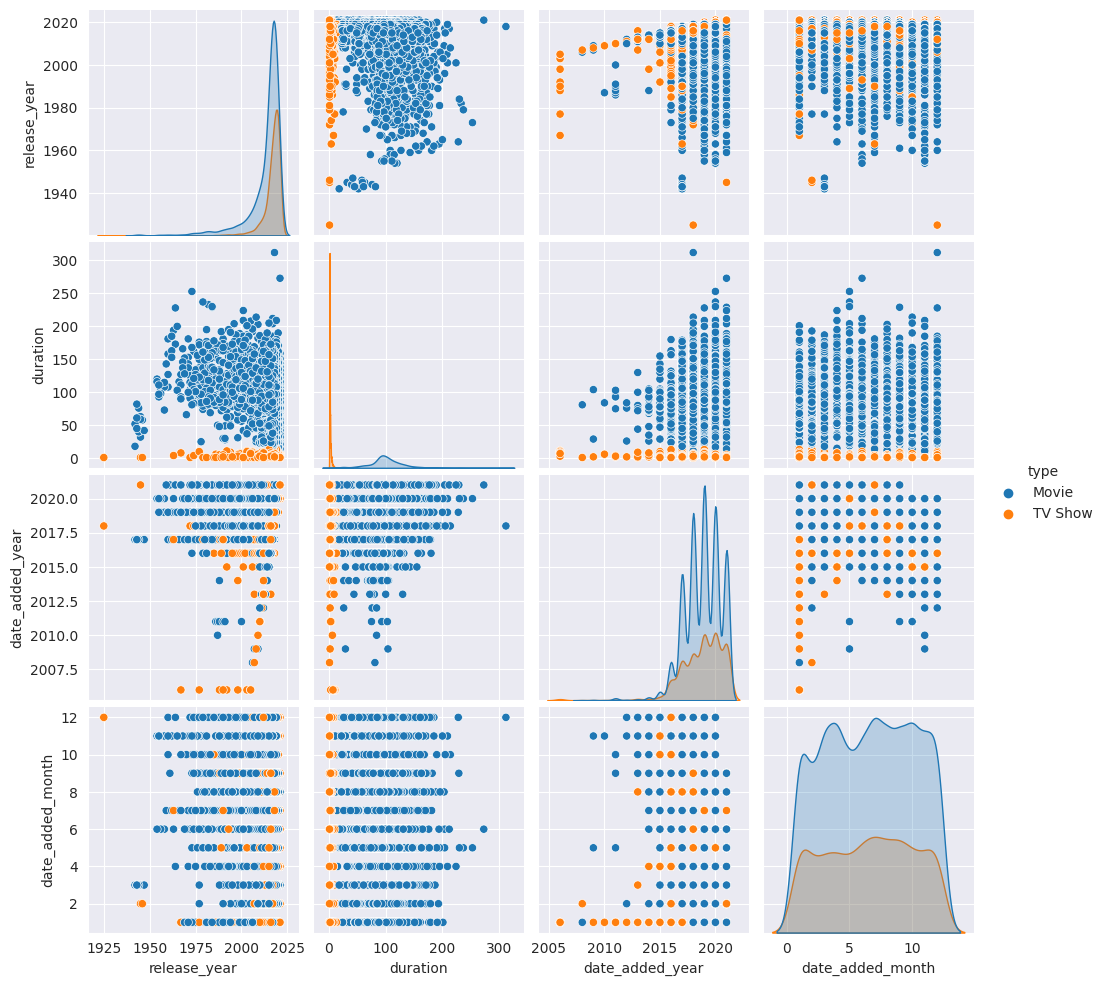

In [20]:
sns.pairplot(df, hue="type")

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- No particular paatern is observed in above plot

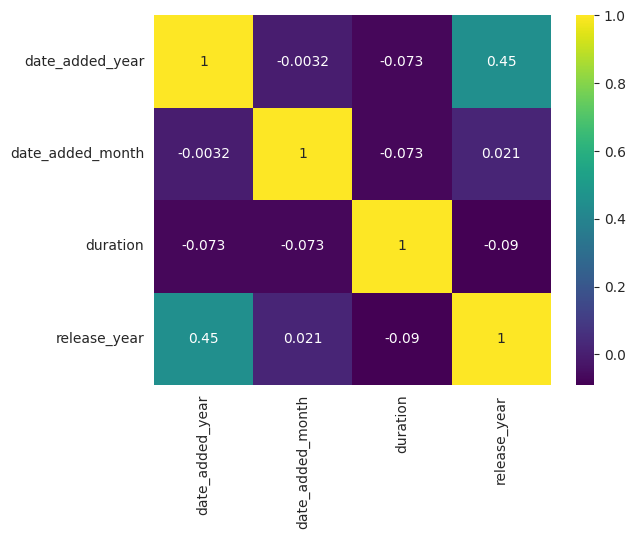

In [21]:
sns.heatmap(tv_shows_df[["date_added_year","date_added_month","duration","release_year"]].corr(), annot=True, cmap="viridis");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- There is no strong correlation between the columns of the tv show data.

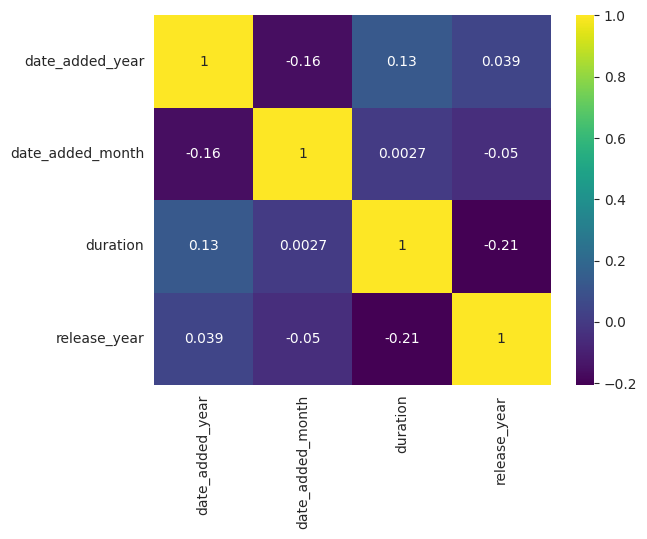

In [22]:
sns.heatmap(movies_df[["date_added_year","date_added_month","duration","release_year"]].corr(), annot=True, cmap="viridis");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- There is no strong correlation between the columns of the movie data.

### <a id='toc1_2_1_'></a>[Country Analysis](#toc0_)

In [23]:
country_df.describe()

,show_id,country
count,10840,10840
unique,8805,127
top,s6234,United States
freq,12,3689


In [24]:
cdf=country_df["country"].value_counts()[:25]
cdf

country
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             392
Japan              318
Spain              232
South Korea        230
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Indonesia           90
Belgium             90
Taiwan              89
Philippines         83
Thailand            70
Name: count, dtype: int64

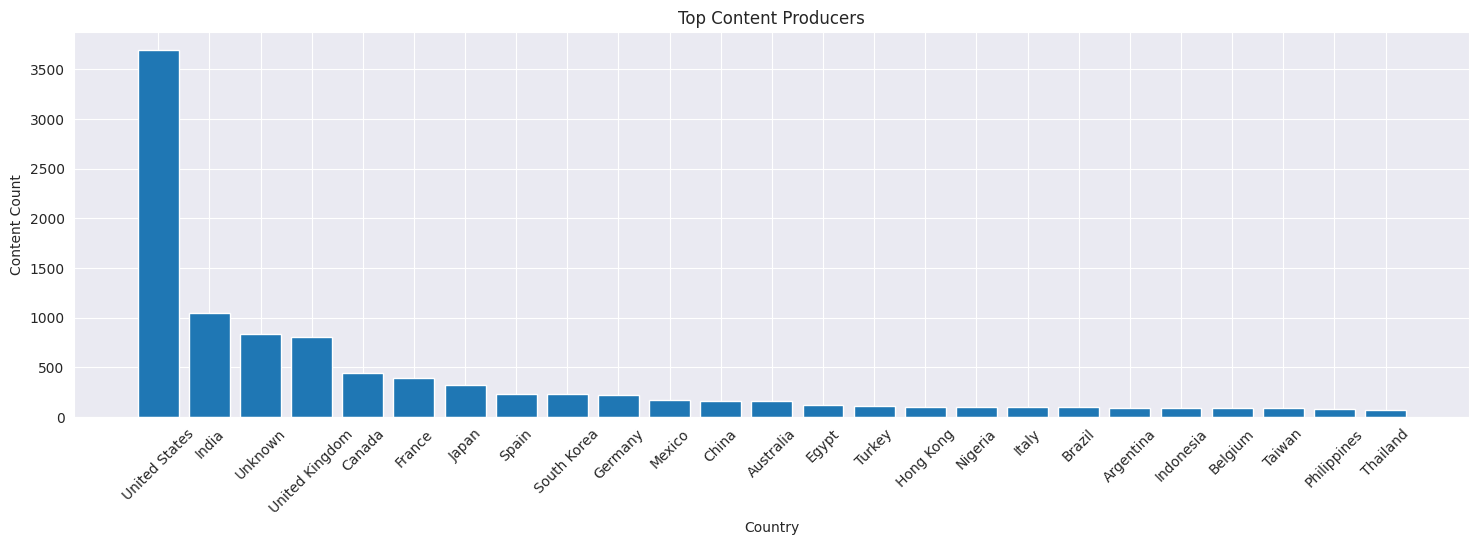

In [25]:

plt.figure(figsize=(18,5))
plt.bar(cdf.index,cdf)
plt.xticks(rotation=45)
plt.ylabel("Content Count")
plt.xlabel("Country")
plt.title("Top Content Producers");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- From above graph we can see that USA is a top content producer.
- Countries like India, UK, Canada, France, Japan, Spain, South Korea and Germany have lot of scope for improvement.
- Countries after Germany have a very high scope for improvement.

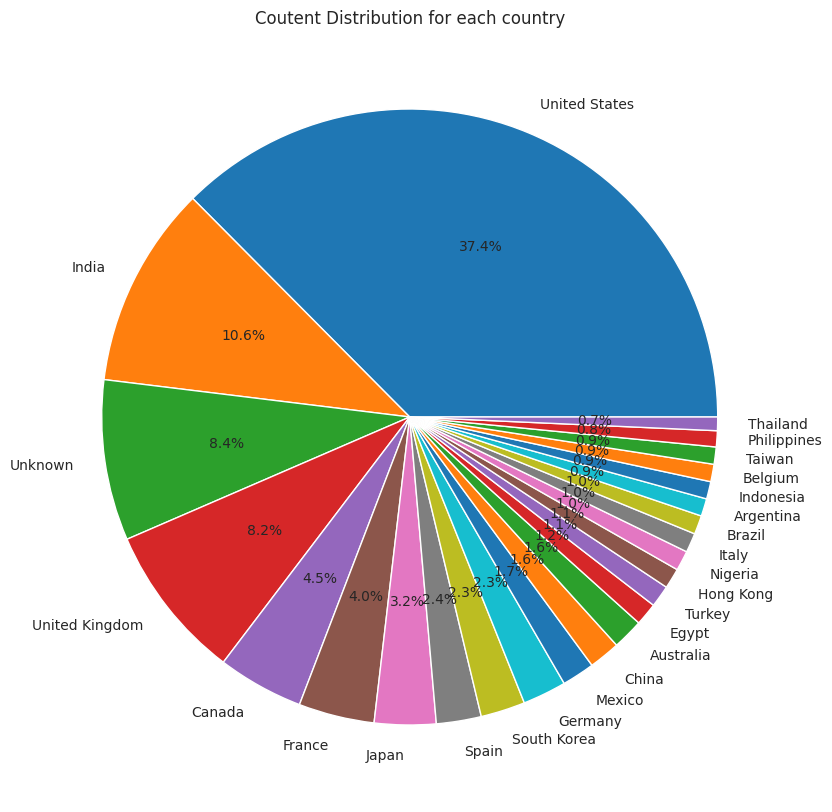

In [26]:
plt.figure(figsize=(10,10))
plt.pie(cdf, labels=cdf.index, autopct= '%1.1f%%')
plt.title("Coutent Distribution for each country");


<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- 37.4% content is produced by USA and 10.6% is produced by India, indicating the popularity of the content available on Netflix
- This is because Hollywood and Bollywood are biggest film industry in the world.

In [27]:
improvement_countries= country_df["country"].value_counts()[1:25].drop(index="Unknown").index.to_list()
improvement_countries
# non_top_3_countrries

['India',
 'United Kingdom',
 'Canada',
 'France',
 'Japan',
 'Spain',
 'South Korea',
 'Germany',
 'Mexico',
 'China',
 'Australia',
 'Egypt',
 'Turkey',
 'Hong Kong',
 'Nigeria',
 'Italy',
 'Brazil',
 'Argentina',
 'Indonesia',
 'Belgium',
 'Taiwan',
 'Philippines',
 'Thailand']

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- We will focus on above countries the most as there is a higher chance of growth if we invest in producing content for them

### <a id='toc1_2_2_'></a>[Cast Analysis](#toc0_)

In [28]:
cast_df.describe()

,show_id,cast
count,64951,64951
unique,8807,36440
top,s1855,Unknown
freq,50,825


In [29]:
merge_df=df.merge(cast_df,on='show_id',how='inner')
merge_df.head()

,show_id,type,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,dat_added_period,cast
0,s1,Movie,2021-09-25,2020,PG-13,90,2021-09,2021,9,September,2016-2022,Unknown
1,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,Ama Qamata
2,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,Khosi Ngema
3,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,Gail Mabalane
4,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,Thabang Molaba


In [30]:
cdf = cast_df["cast"].value_counts()[:11].reset_index()
cdf

,cast,count
0,Unknown,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Akshay Kumar,30
8,Om Puri,30
9,Yuki Kaji,29


<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Above table shows the list of top cast present in movies and tv shows
- There is lot of missing values in this data, which have been replaced by "Unknown"
- Anupam Kher appears to be in maximum number of content present on Netflix

In [31]:
cdf = cdf.iloc[1:11]
mdf=merge_df.loc[merge_df["type"]=="Movie"]["cast"].value_counts()[1:11].reset_index()
tdf=merge_df.loc[merge_df["type"]=="TV Show"]["cast"].value_counts()[1:11].reset_index()
print("Overall Top Cast")
cdf
print("Movie Top Cast")
mdf
print("TV Show Top Cast")
tdf

Overall Top Cast


,cast,count
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Akshay Kumar,30
8,Om Puri,30
9,Yuki Kaji,29
10,Amitabh Bachchan,28


Movie Top Cast


,cast,count
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Om Puri,30
4,Akshay Kumar,30
5,Paresh Rawal,28
6,Julie Tejwani,28
7,Amitabh Bachchan,28
8,Rupa Bhimani,27
9,Boman Irani,27


TV Show Top Cast


,cast,count
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Daisuke Ono,17
3,Junichi Suwabe,17
4,Ai Kayano,17
5,Yuichi Nakamura,16
6,Yoshimasa Hosoya,15
7,Jun Fukuyama,15
8,David Attenborough,14
9,Yoshitsugu Matsuoka,13


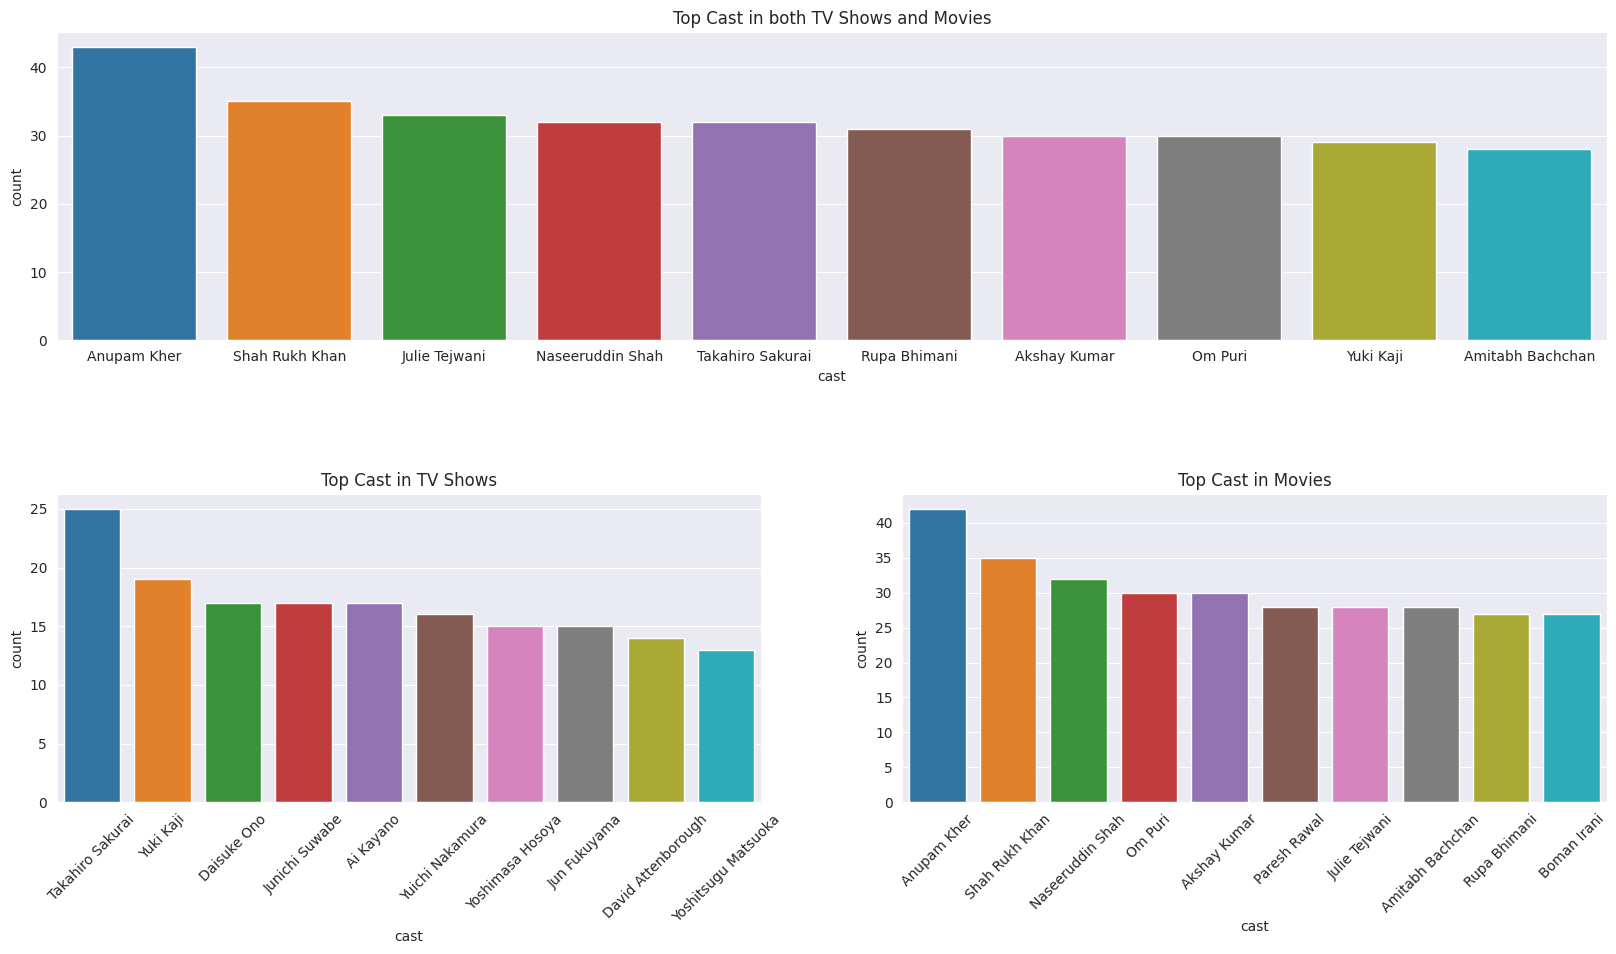

In [32]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], hspace=0.5)


ax1 = plt.subplot(gs[0, :])
sns.barplot(data=cdf, x="cast", y="count", ax=ax1)
# ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title("Top Cast in both TV Shows and Movies")

ax2 = plt.subplot(gs[1, 0])
sns.barplot(data=tdf, x="cast", y="count", ax=ax2)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title("Top Cast in TV Shows")


ax3 = plt.subplot(gs[1, 1])
sns.barplot(data=mdf, x="cast", y="count", ax=ax3)
ax3.set_title("Top Cast in Movies")
ax3.tick_params(axis='x', labelrotation=45);


<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Above visuals shows the list of top cast present in movies and tv shows
- There appears to be lot of Indian actors in the movies section
- Takahiro Sakurai is the most popular actor in the TV show section
- Anupam Kher is the most popular actor in the movies section and overall section


In [33]:
cast_count_df=duckdb.sql(""" 
           with cte as (
            select distinct show_id, type,country, cast_df.cast from df 
            join cast_df using(show_id) 
            join country_df using(show_id) 
            where country != 'Unknown' and cast_df.cast != 'Unknown' 
           )
           select country, sum(case when type ='TV Show' then 1 else 0 end) "tv cast count", 
           sum(case when type ='Movie' then 1 else 0 end) "movie cast count" from cte 
           group by country order by "tv cast count" desc
""").df()
cast_count_df.head(20)

,country,tv cast count,movie cast count
0,United States,6578.0,20484.0
1,Japan,2329.0,1124.0
2,United Kingdom,1572.0,3751.0
3,South Korea,1306.0,481.0
4,Canada,1033.0,2486.0
5,Mexico,710.0,734.0
6,France,685.0,2408.0
7,Spain,600.0,1303.0
8,Taiwan,508.0,131.0
9,Australia,450.0,707.0


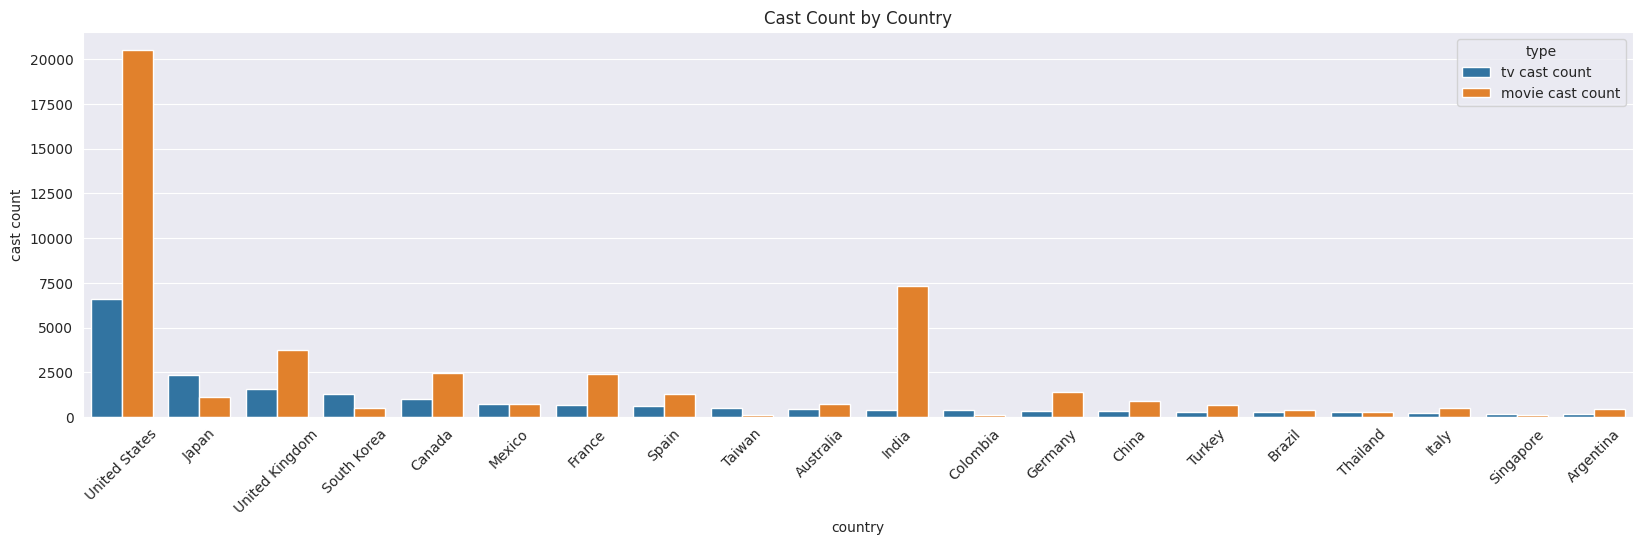

In [34]:
temp_df=cast_count_df.head(20).melt(id_vars=['country'],var_name="type", value_name='cast count')
plt.figure(figsize=(20,5))
lp=sns.barplot(data=temp_df, x="country", y="cast count", hue="type")
plt.xticks(rotation=45)
plt.title("Cast Count by Country");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- We can see that Japan, South Korea and Taiwan have more TV casts than movies indicating that users are more likely to watch TV shows


### <a id='toc1_2_3_'></a>[Genre Analysis](#toc0_)

In [35]:
listed_df.describe()

,show_id,listed_in
count,19323,19323
unique,8807,42
top,s8807,International Movies
freq,3,2752


In [36]:
ldf=listed_df["listed_in"].value_counts()[:10].reset_index()
ldf

,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


In [37]:
merge_df=df.merge(listed_df,on='show_id',how='inner')
merge_df.head()

,show_id,type,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,dat_added_period,listed_in
0,s1,Movie,2021-09-25,2020,PG-13,90,2021-09,2021,9,September,2016-2022,Documentaries
1,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,International TV Shows
2,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,TV Dramas
3,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,TV Mysteries
4,s3,TV Show,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,2016-2022,Crime TV Shows


In [38]:
mdf=merge_df.loc[merge_df["type"]=="Movie"]["listed_in"].value_counts()[:10].reset_index()
tdf=merge_df.loc[merge_df["type"]=="TV Show"]["listed_in"].value_counts()[:10].reset_index()
ldf
mdf
tdf

,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


,listed_in,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


,listed_in,count
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451
5,Docuseries,395
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,253
9,Anime Series,176


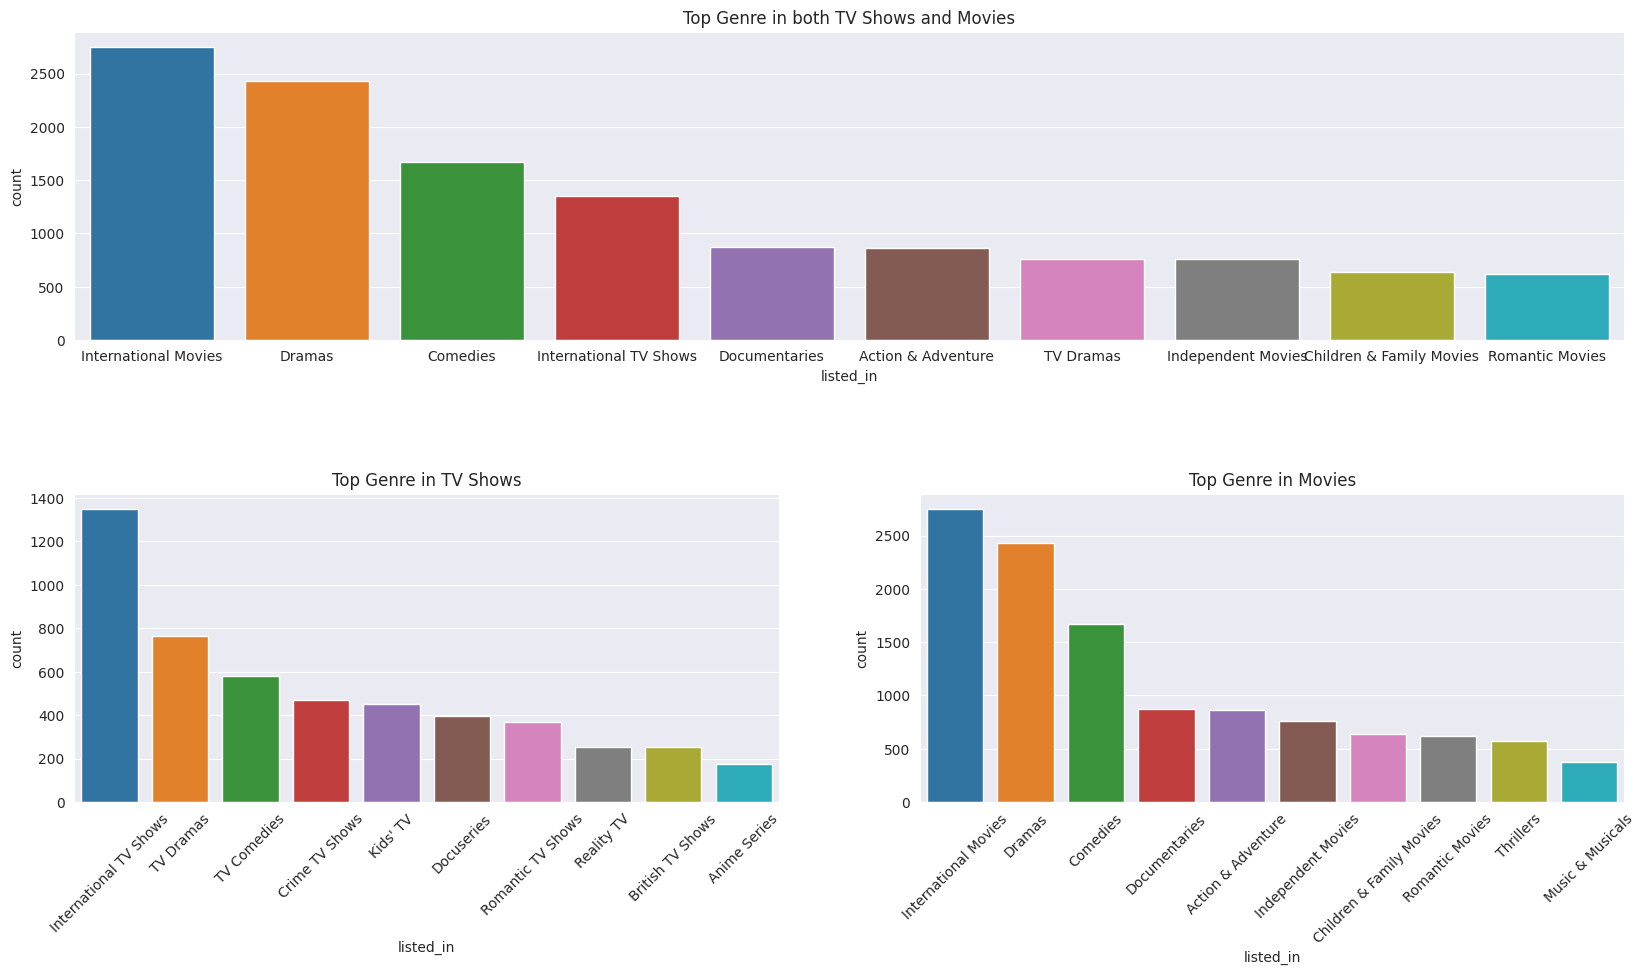

In [39]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], hspace=0.5)


ax1 = plt.subplot(gs[0, :])
sns.barplot(data=ldf, x="listed_in", y="count", ax=ax1)
# ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title("Top Genre in both TV Shows and Movies")

ax2 = plt.subplot(gs[1, 0])
sns.barplot(data=tdf, x="listed_in", y="count", ax=ax2)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title("Top Genre in TV Shows")


ax3 = plt.subplot(gs[1, 1])
sns.barplot(data=mdf, x="listed_in", y="count", ax=ax3)
ax3.set_title("Top Genre in Movies")
ax3.tick_params(axis='x', labelrotation=45);

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Above graphs shows the list of top genres present in movies and tv show category
- It appears that users like watching international movies/tv shows, dramas and comedies the most
- This indicates there is high demand for International content in both TV and movies sectiion


#### <a id='toc1_2_3_1_'></a>[Movie Genre Analysis](#toc0_)

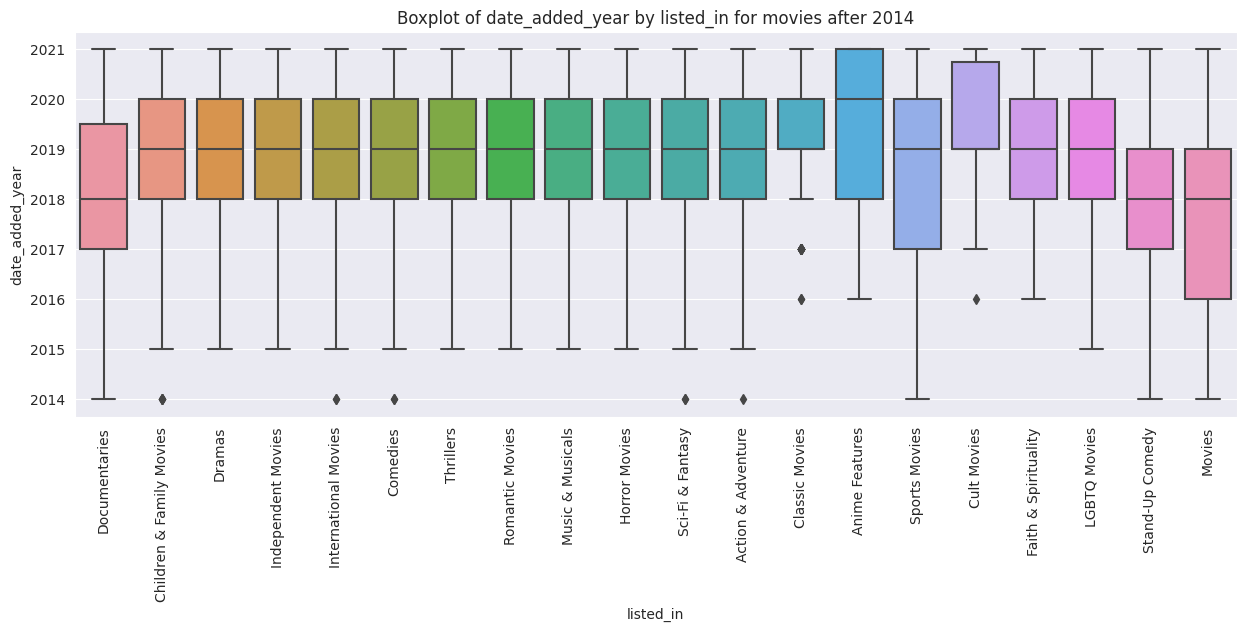

In [40]:
merge_df=movies_df.merge(listed_df, on='show_id', how='inner')
merge_df_trunc = merge_df.loc[merge_df['date_added_year'] >= 2014]
plt.figure(figsize=(15, 5))
sns.boxplot(data=merge_df_trunc, x="listed_in", y="date_added_year")
plt.title("Boxplot of date_added_year by listed_in for movies after 2014")
plt.xticks(rotation=90);

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Majority of the content has added during 2018 - 2020

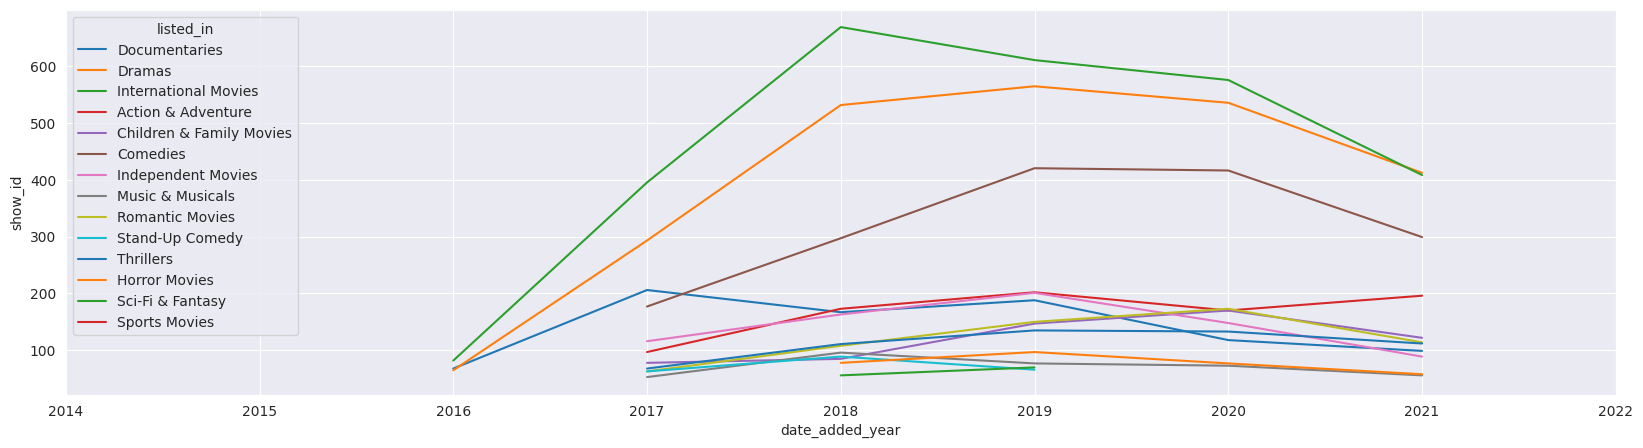

In [41]:
temp_df=merge_df.groupby(["date_added_year","listed_in"])["show_id"].count().reset_index()
temp_df=temp_df.loc[temp_df["show_id"]>50]
plt.figure(figsize=(20,5))
sns.lineplot(data=temp_df, y="show_id", x="date_added_year", hue="listed_in", palette="tab10" )
plt.xlim((2014,2022));

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- International movies, Dramas and Comedies have been added the most over last few years indicating popularity of those genre in movie section

#### <a id='toc1_2_3_2_'></a>[TV Show Genre Analysis](#toc0_)

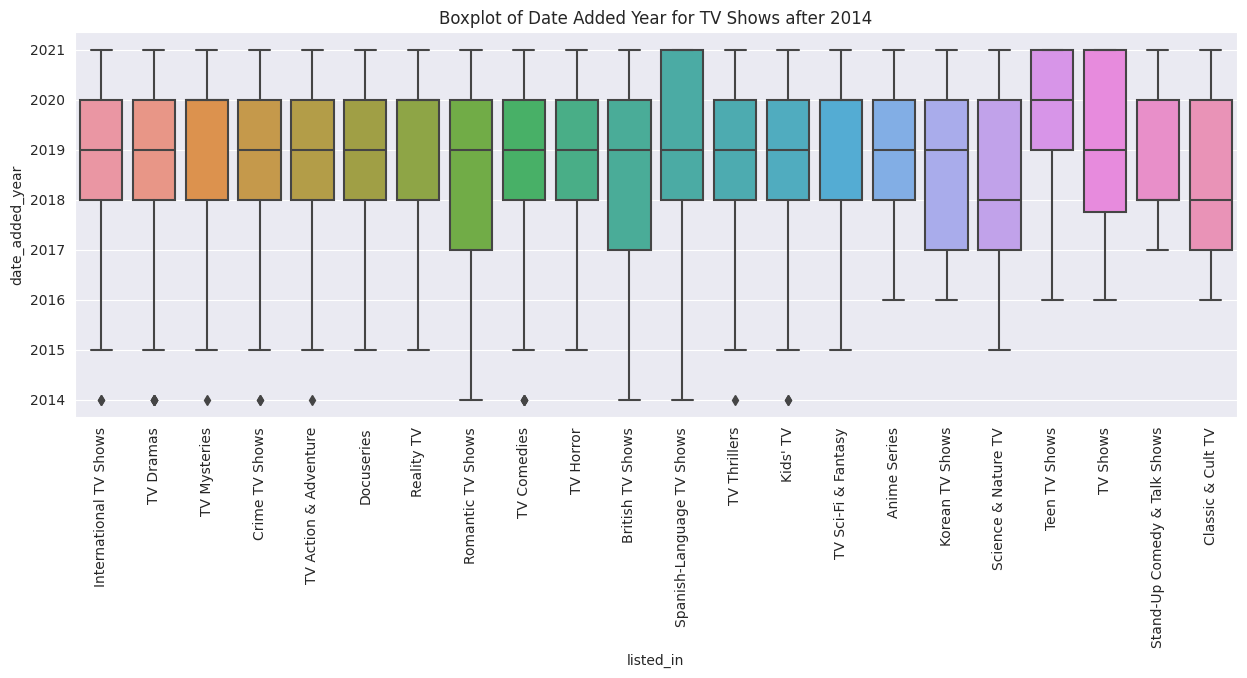

In [42]:
merge_df=tv_shows_df.merge(listed_df, on='show_id', how='inner')
merge_df_trunc = merge_df.loc[merge_df['date_added_year'] >= 2014]
plt.figure(figsize=(15, 5))
sns.boxplot(data=merge_df_trunc, x="listed_in", y="date_added_year")
plt.title('Boxplot of Date Added Year for TV Shows after 2014')
plt.xticks(rotation=90);

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Majority of the content has added during 2018 - 2020 indicating Netflix popularity.

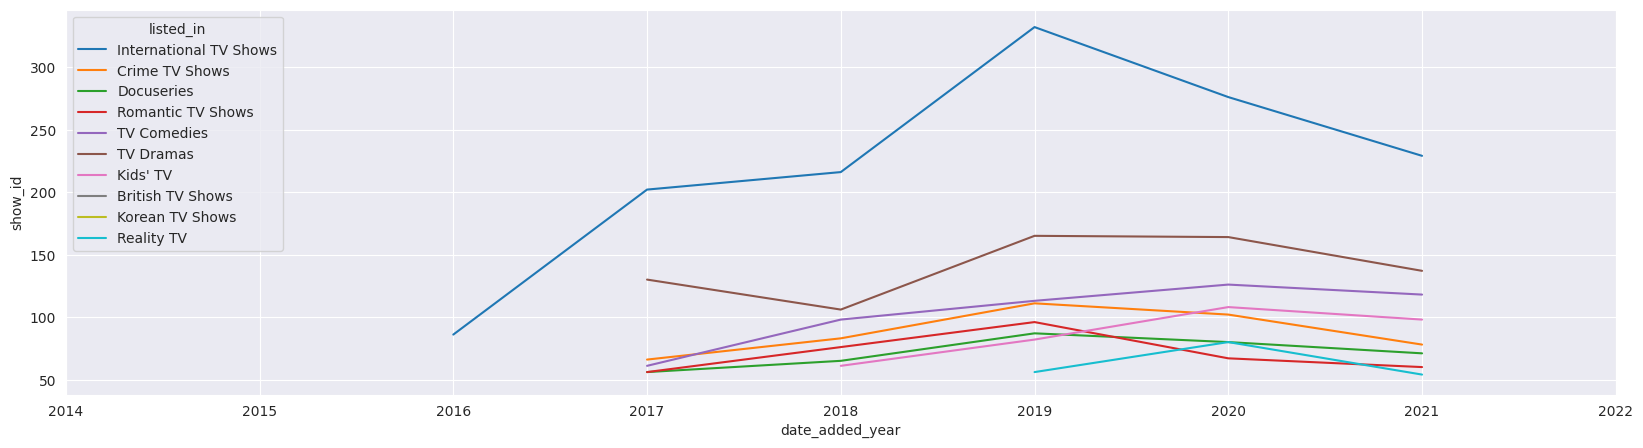

In [43]:
temp_df=merge_df.groupby(["date_added_year","listed_in"])["show_id"].count().reset_index()
temp_df=temp_df.loc[temp_df["show_id"]>50]
plt.figure(figsize=(20,5))
sns.lineplot(data=temp_df, y="show_id", x="date_added_year", hue="listed_in", palette="tab10" )
plt.xlim((2014,2022));

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- International TV shows have been added the most over last few years indicating popularity of this genre in TV show section

### <a id='toc1_2_4_'></a>[Director Analysis](#toc0_)

In [44]:
director_df.describe()

,show_id,director
count,9612,9612
unique,8807,4994
top,s5888,Unknown
freq,13,2634


In [45]:
director_df.value_counts()

show_id  director        
s3719    Miguel Cohan        2
s1       Kirsten Johnson     1
s632     Unknown             1
s6320    Miguel Conde        1
s6321    Supavitra Babul     1
                            ..
s3658    Peter Sullivan      1
s3659    Aditya Sarpotdar    1
s366     Najwa Najjar        1
s3660    Unknown             1
s999     Unknown             1
Name: count, Length: 9611, dtype: int64

In [46]:
director_df["director"].nunique()

4994

In [47]:
director_df.drop_duplicates()

,show_id,director
0,s1,Kirsten Johnson
1,s2,Unknown
2,s3,Julien Leclercq
3,s4,Unknown
4,s5,Unknown
...,...,...
9607,s8803,David Fincher
9608,s8804,Unknown
9609,s8805,Ruben Fleischer
9610,s8806,Peter Hewitt


In [48]:
merge_df=df.merge(director_df,on='show_id',how='inner')
merge_df.head()

,show_id,type,date_added,release_year,rating,duration,date_added_year_month,date_added_year,date_added_month,date_added_month_name,dat_added_period,director
0,s1,Movie,2021-09-25,2020,PG-13,90,2021-09,2021,9,September,2016-2022,Kirsten Johnson
1,s2,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,Unknown
2,s3,TV Show,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,2016-2022,Julien Leclercq
3,s4,TV Show,2021-09-24,2021,TV-MA,1,2021-09,2021,9,September,2016-2022,Unknown
4,s5,TV Show,2021-09-24,2021,TV-MA,2,2021-09,2021,9,September,2016-2022,Unknown


In [49]:
ddf = director_df["director"].value_counts()[:11].reset_index()
ddf

,director,count
0,Unknown,2634
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Martin Scorsese,12
9,Jay Chapman,12


<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Above table shows the list of top directors present in movies and tv shows
- There is lot of missing values in this data, which have been replaced by "Unknown"

In [50]:
ddf = ddf.iloc[1:11]
mdf=merge_df.loc[merge_df["type"]=="Movie"]["director"].value_counts()[1:11].reset_index()
tdf=merge_df.loc[merge_df["type"]=="TV Show"]["director"].value_counts()[1:11].reset_index()
ddf
mdf
tdf

,director,count
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Martin Scorsese,12
9,Jay Chapman,12
10,Youssef Chahine,12


,director,count
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Jay Karas,15
5,Marcus Raboy,15
6,Cathy Garcia-Molina,13
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Jay Chapman,12


,director,count
0,Alastair Fothergill,3
1,Ken Burns,3
2,Iginio Straffi,2
3,Gautham Vasudev Menon,2
4,Hsu Fu-chun,2
5,Stan Lathan,2
6,Shin Won-ho,2
7,Joe Berlinger,2
8,Lynn Novick,2
9,Rob Seidenglanz,2


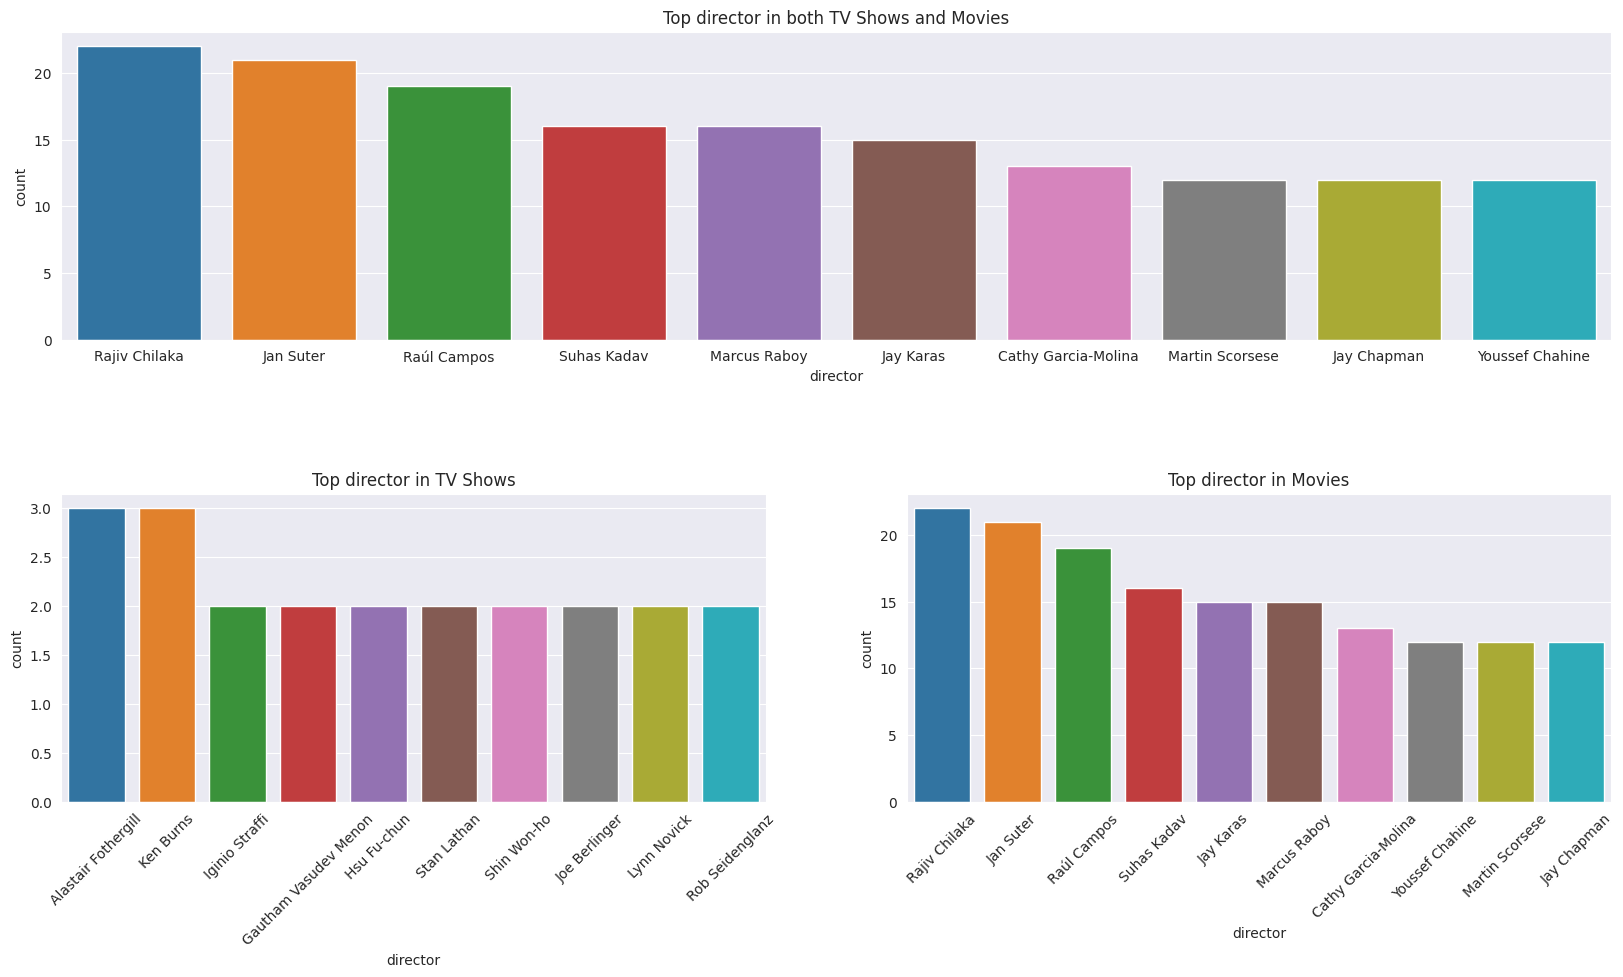

In [51]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], hspace=0.5)


ax1 = plt.subplot(gs[0, :])
sns.barplot(data=ddf, x="director", y="count", ax=ax1)
ax1.set_title("Top director in both TV Shows and Movies")

ax2 = plt.subplot(gs[1, 0])
sns.barplot(data=tdf, x="director", y="count", ax=ax2)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title("Top director in TV Shows")


ax3 = plt.subplot(gs[1, 1])
sns.barplot(data=mdf, x="director", y="count", ax=ax3)
ax3.set_title("Top director in Movies")
ax3.tick_params(axis='x', labelrotation=45);

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Above graphs shows the list of top directors present in movies and tv shows

### <a id='toc1_2_5_'></a>[Release Timeline Analysis](#toc0_)

#### <a id='toc1_2_5_1_'></a>[Analysis of all time data](#toc0_)

In [52]:
stream_timeline=df.groupby(["date_added_year_month","type"])["show_id"].count().reset_index().set_index("date_added_year_month")
stream_timeline.head()

,type,show_id
date_added_year_month,,
2006-01,TV Show,10
2008-01,Movie,1
2008-02,TV Show,1
2009-01,TV Show,1
2009-05,Movie,1


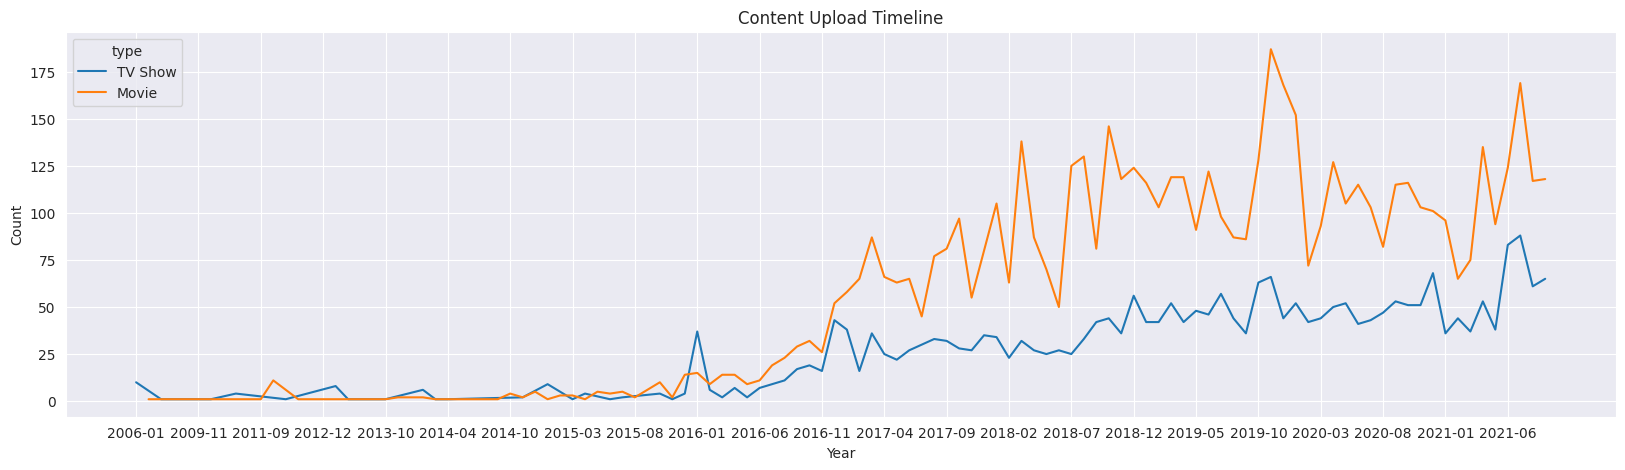

In [53]:
plt.figure(figsize=(20,5))
# fig, ax = plt.subplots(figsize=(20, 5))
l=sns.lineplot(data=stream_timeline, x="date_added_year_month", y="show_id", hue="type")
l.set(xlabel="Year", ylabel="Count");
l.set_title("Content Upload Timeline");
l.set_xticks(l.get_xticks()[::5]);
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
# plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- From above graph, we can see that majority of content got added after 2015.
- Over the years, the amount of tv shows added were comparatively less than movies.
- This shows that movies are more popular than tv shows.

In [54]:
monthly_release=df.groupby(["date_added_month","date_added_month_name","type"])["show_id"].count().reset_index().set_index("date_added_month")
monthly_release.head()

,date_added_month_name,type,show_id
date_added_month,,,
1,January,Movie,546
1,January,TV Show,279
2,February,Movie,382
2,February,TV Show,175
3,March,Movie,529


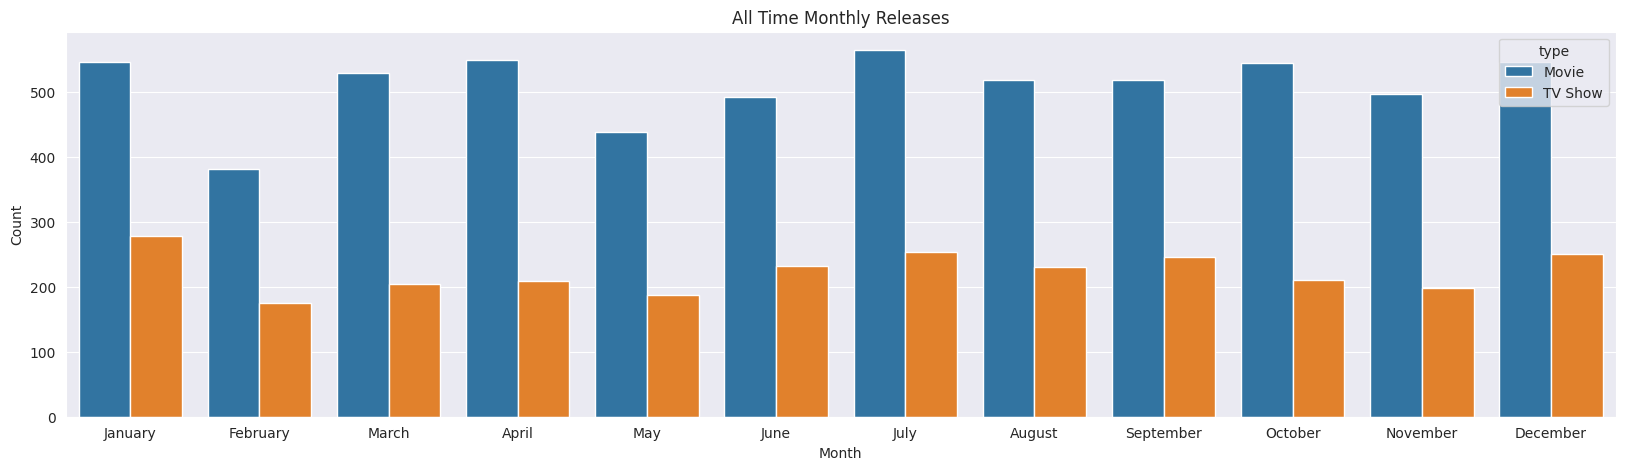

In [55]:
plt.figure(figsize=(20,5))

lp=sns.barplot(data=monthly_release, x="date_added_month_name", y="show_id", hue="type")
lp.set(xlabel="Month", ylabel="Count");
lp.set_title("All Time Monthly Releases");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- From above plot we can see that January, April, July and December months has highest number of content added.
- This seems to be ideal time to release content

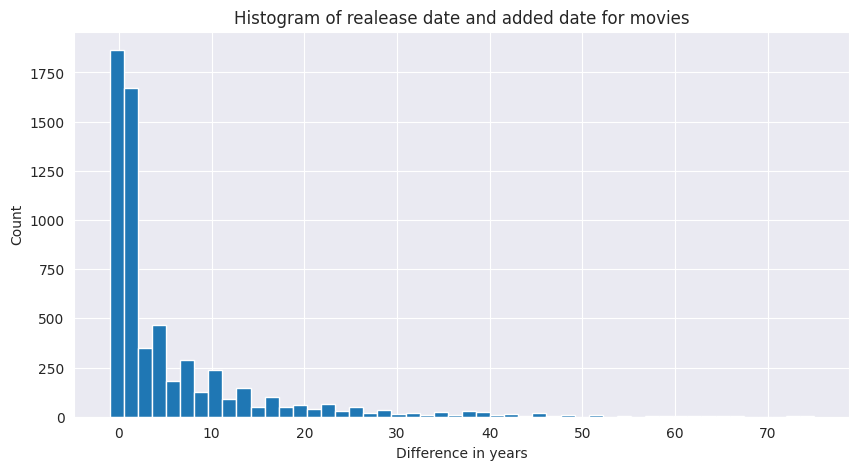

In [56]:
plt.figure(figsize=(10,5))
(movies_df["date_added_year"] - movies_df["release_year"]).hist(bins=50)
plt.title("Histogram of realease date and added date for movies")
plt.xlabel("Difference in years")
plt.ylabel("Count");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Majority of the movies are added under 1 year after the release date.
- This shows that people are eager to watch the movie after its theatrical release date.
- Netflix should produce more original content

#### <a id='toc1_2_5_2_'></a>[Analysis of latest data](#toc0_)

In [57]:
latest_data=df.loc[df["dat_added_period"].isin(["2016-2022"])]

In [58]:
monthly_release_latest=latest_data.groupby(["date_added_month","date_added_month_name","type"])["show_id"].count().reset_index().set_index("date_added_month")
monthly_release.head()

,date_added_month_name,type,show_id
date_added_month,,,
1,January,Movie,546
1,January,TV Show,279
2,February,Movie,382
2,February,TV Show,175
3,March,Movie,529


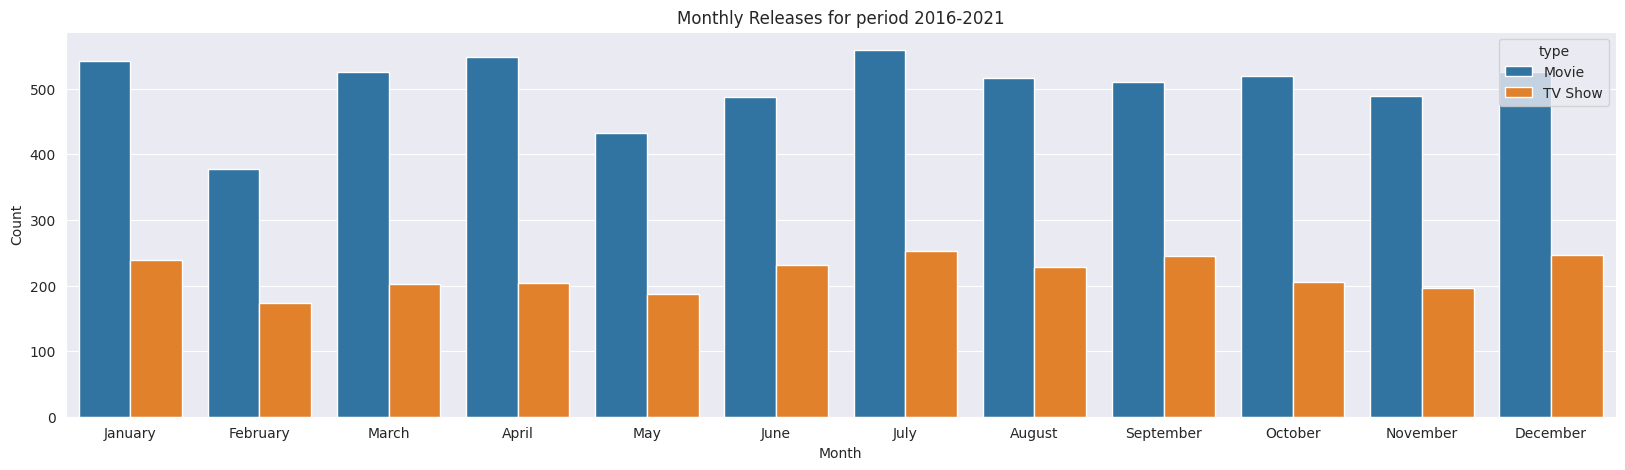

In [59]:
plt.figure(figsize=(20,5))

lp=sns.barplot(data=monthly_release_latest, x="date_added_month_name", y="show_id", hue="type")
lp.set(xlabel="Month", ylabel="Count");
lp.set_title("Monthly Releases for period 2016-2021");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- From above plot we can see that January, April, July and December months has highest number of content added even for recent data.
- This seems to be ideal time to release content

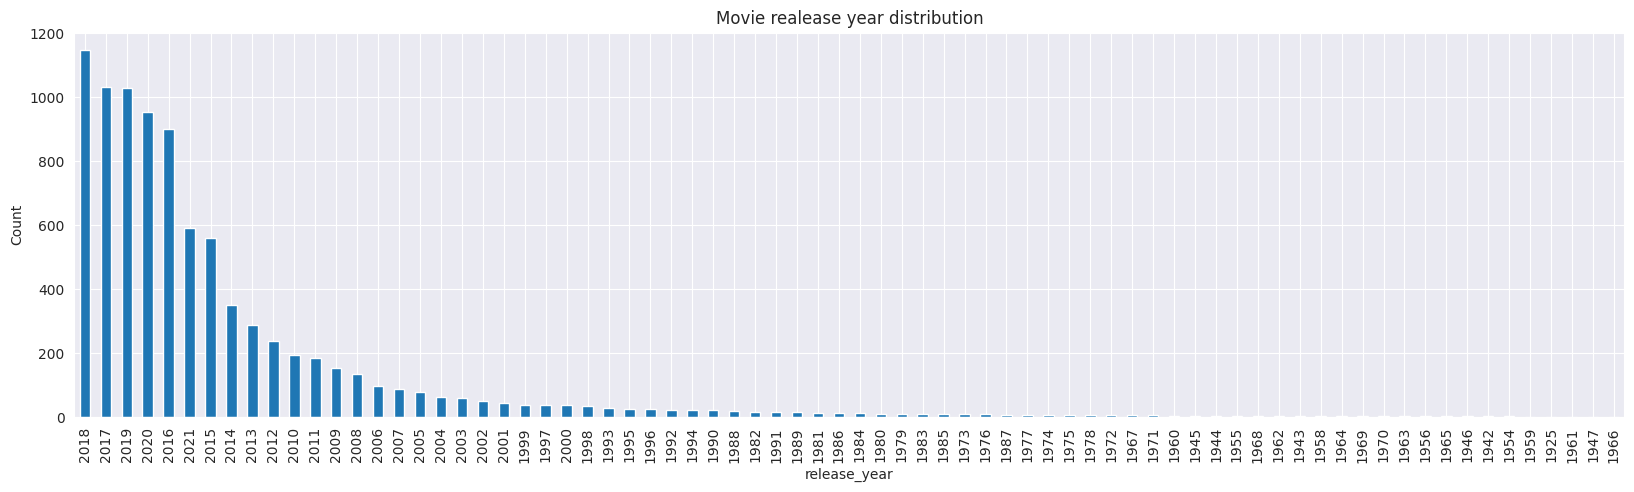

In [60]:
plt.figure(figsize=(20,5))
df["release_year"].value_counts().plot(kind="bar");
plt.ylabel("Count");
plt.title("Movie realease year distribution");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- From above graph, we can see that majority of content that is added was realeased after 2014
- This shows that more and more content producers are using Netflix to distribute their content.

### <a id='toc1_2_6_'></a>[Movie and TV Show Distribution Analysis](#toc0_)

In [61]:
pdf=df["type"].value_counts()
pdf

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

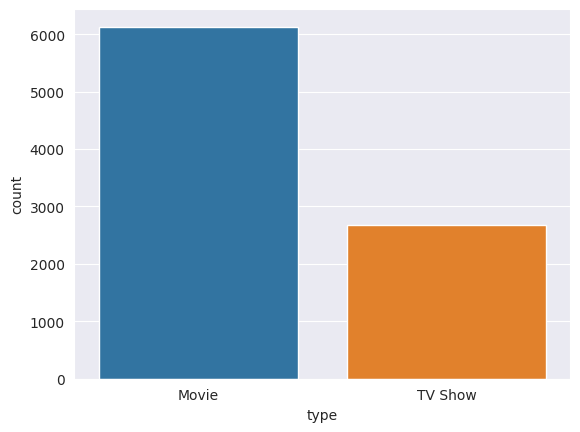

In [62]:
sns.countplot(data=df, x="type");

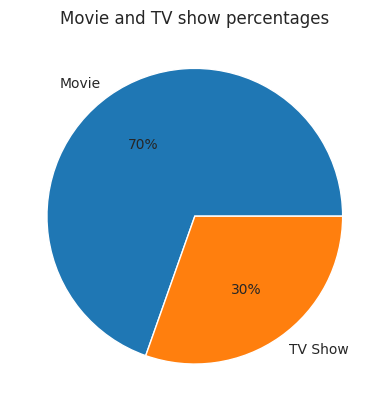

In [63]:
plt.pie(pdf, labels=pdf.index, autopct='%.0f%%')
plt.title("Movie and TV show percentages");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- From above plot we can say that movies are more popular than TV shows
- This shows that users are more interested in stories that get over in under 2hrs.

#### <a id='toc1_2_6_1_'></a>[TV Show popularity analysis](#toc0_)

In [64]:
tmdf=df.merge(country_df, on="show_id").groupby(["country","type"])["show_id"].count().reset_index().rename(columns={"show_id":"count"}).sort_values(by="count", ascending=False)
tmdf

,country,type,count
175,United States,Movie,2751
66,India,Movie,962
176,United States,TV Show,938
172,United Kingdom,Movie,532
178,Unknown,Movie,440
...,...,...,...
98,Malta,TV Show,1
1,Albania,Movie,1
91,Lithuania,Movie,1
90,Liechtenstein,Movie,1


In [65]:
tmdf=tmdf.pivot(index="country", columns="type", values="count").fillna(0)
tmdf.loc[tmdf["TV Show"]>tmdf["Movie"]].sort_values(by="TV Show", ascending=False)

type,Movie,TV Show
country,,
Japan,119.0,199.0
South Korea,61.0,169.0
Taiwan,19.0,70.0
Colombia,20.0,32.0
Singapore,18.0,23.0
Russia,11.0,16.0
Ukraine,1.0,2.0
Azerbaijan,0.0,1.0
Belarus,0.0,1.0


<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Above table consist of those countries which have higher count of tv shows as compared to movies
- We can see that Japan, South Korea, Taiwan have the biggest difference in number of tv shows compared to movies. 
- Netflix should add more tv shows in above countries

### <a id='toc1_2_7_'></a>[Rating Analyisis](#toc0_)

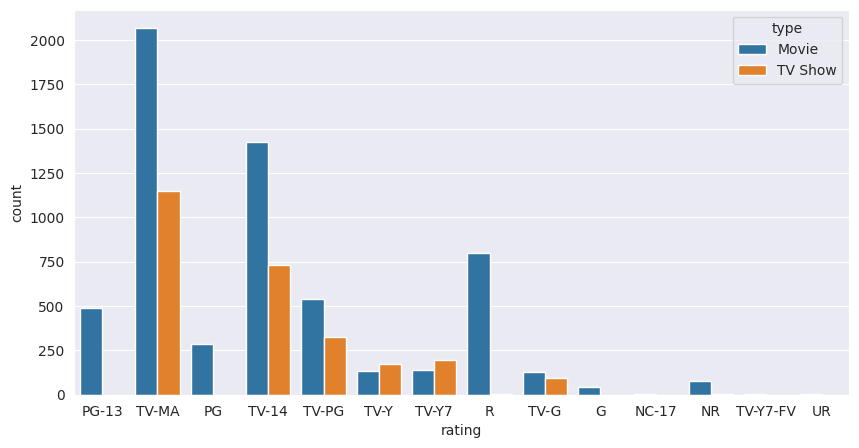

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="rating", hue="type");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- From above plot we can say that "TV-MA" and "TV-14 rated content is the most popular
- This plot also shows that majority of the users are of age 14 and above

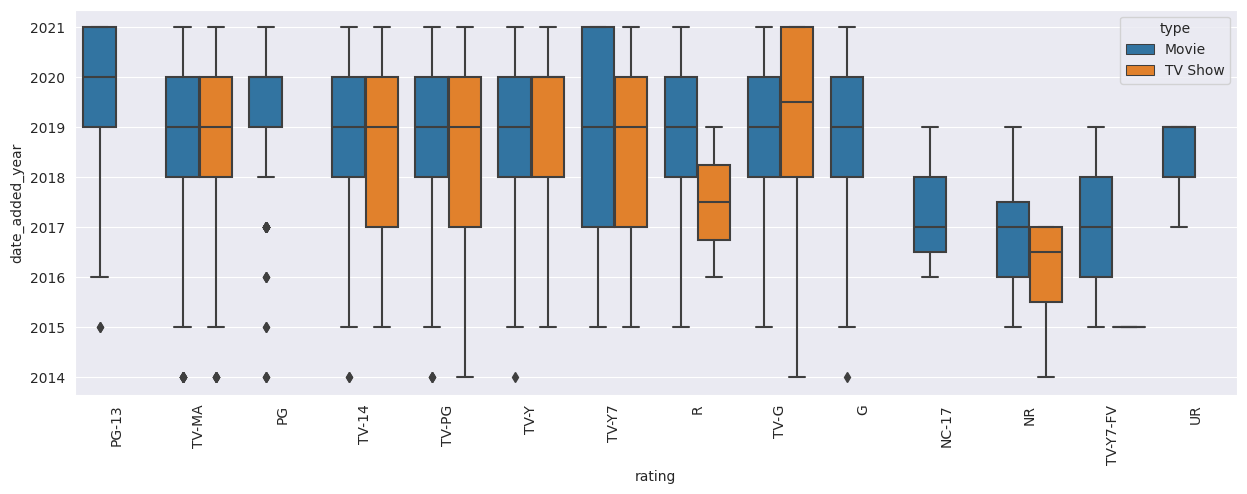

In [67]:
plt.figure(figsize=(15, 5))
rating_df = df.loc[df['date_added_year'] >= 2014]
sns.boxplot(data=rating_df, x="rating", y="date_added_year", hue="type")
plt.xticks(rotation=90);

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Majority of the content was added during 2017 - 2020
- It looks like NC-17, NR, TV-Y7-FV rated content was stopped after 2019, indicating less popularity among users

### <a id='toc1_2_8_'></a>[Duration Anaylsis](#toc0_)

#### <a id='toc1_2_8_1_'></a>[TV Show Analysis](#toc0_)

In [68]:
tv_shows_df["duration"].value_counts()

duration
1     1793
2      425
3      199
4       95
5       65
6       33
7       23
8       17
9        9
10       7
13       3
15       2
12       2
11       2
17       1
Name: count, dtype: int64

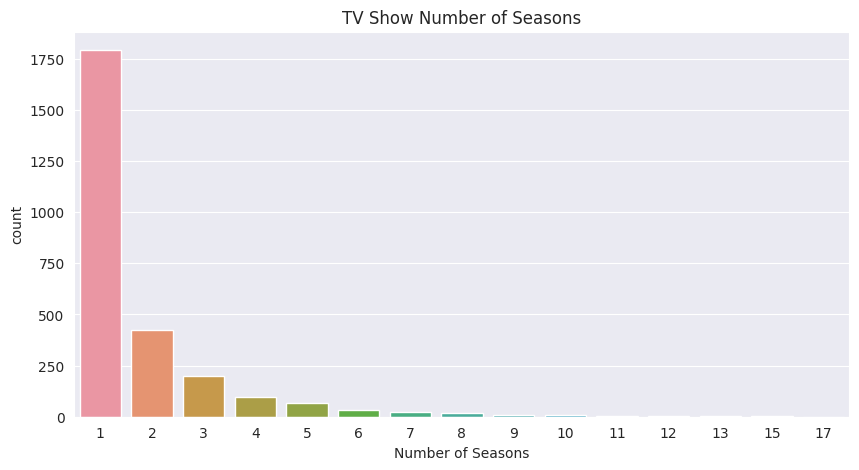

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(data=tv_shows_df, x="duration")
plt.title("TV Show Number of Seasons")
plt.xlabel("Number of Seasons");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- According to histogram data, we can see that majority of the tv shows have a duration of 1 season.
- This shows that majority of the users like tv shows that end their story in 1 season. 

In [70]:
temp_df=tv_shows_df.groupby(["date_added_year","duration"])["show_id"].count().reset_index()
temp_df

,date_added_year,duration,show_id
0,2006,3,1
1,2006,5,2
2,2006,7,1
3,2006,8,2
4,2006,10,2
...,...,...,...
86,2021,8,1
87,2021,9,2
88,2021,10,1
89,2021,13,1


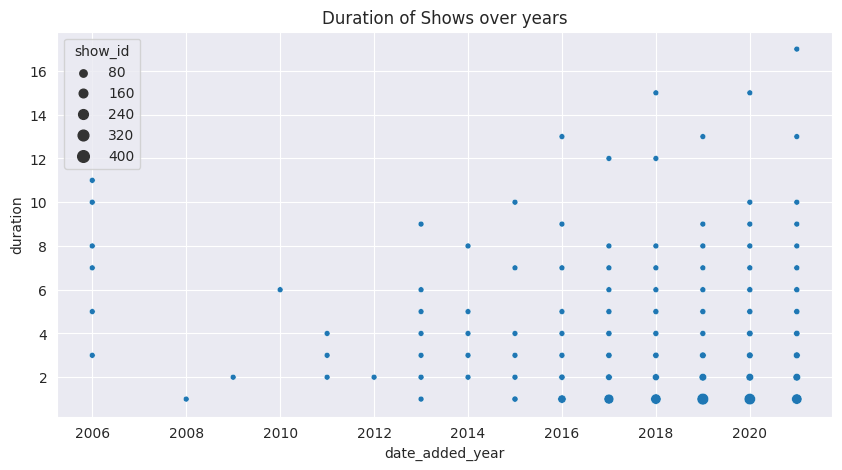

In [71]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=temp_df, x="date_added_year", y="duration", size="show_id")
plt.title("Duration of Shows over years");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- We can say that as small amount of longer duration shows were added to the platform over the years.
- These are the classic shows that have released during the 2000s or before.This indicates that there are some users who would want to watch older shows.
- Netflix should add more of these to the platform.

In [72]:
temp_df=tv_shows_df.groupby(["date_added_month_name","duration"])["show_id"].count().reset_index()
temp_df

,date_added_month_name,duration,show_id
0,April,1,148
1,April,2,29
2,April,3,14
3,April,4,6
4,April,5,3
...,...,...,...
101,September,5,7
102,September,6,4
103,September,7,2
104,September,8,4


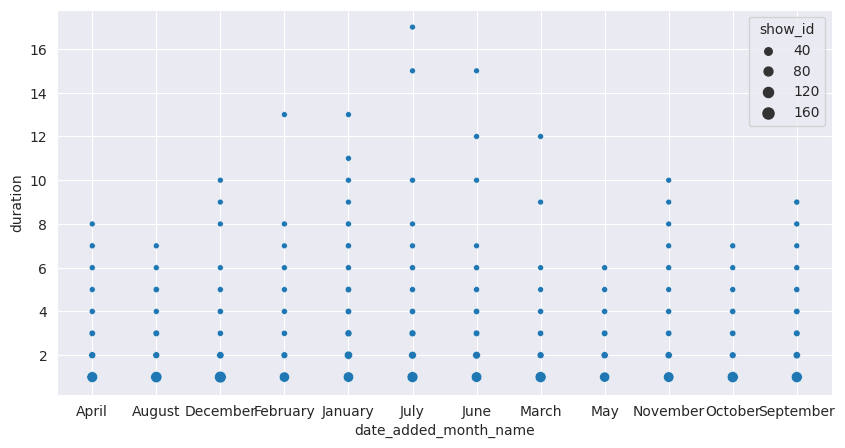

In [73]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=temp_df, x="date_added_month_name", y="duration", size="show_id");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- There seems to be no pattern of number of season wrt added month of the year

#### <a id='toc1_2_8_2_'></a>[Movie Analysis](#toc0_)

In [74]:
movies_df["duration"].value_counts()

duration
90     152
94     146
97     146
93     146
91     144
      ... 
208      1
5        1
16       1
186      1
191      1
Name: count, Length: 205, dtype: int64

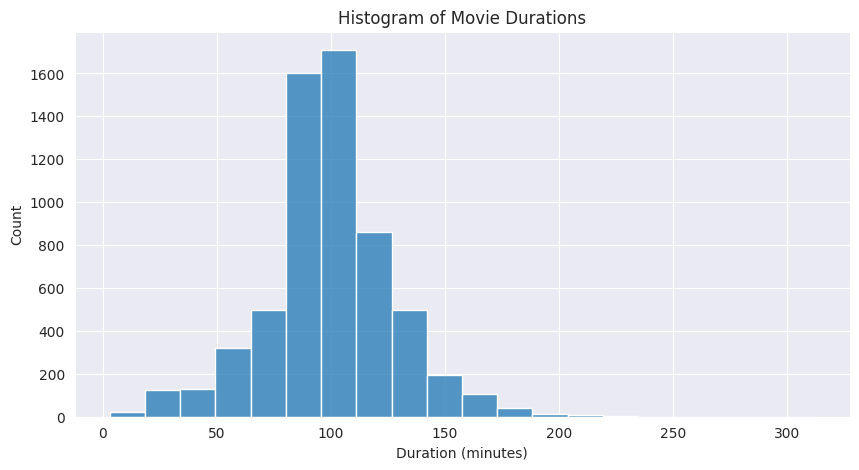

In [75]:
plt.figure(figsize=(10,5))
sns.histplot(data=movies_df, x="duration", bins=20)
plt.title("Histogram of Movie Durations")
plt.xlabel("Duration (minutes)");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- According to histogram data, we can see that majority of the movies have a duration of 90min - 120min.
- This shows that people are highly interested in movies that are around 2 hrs.

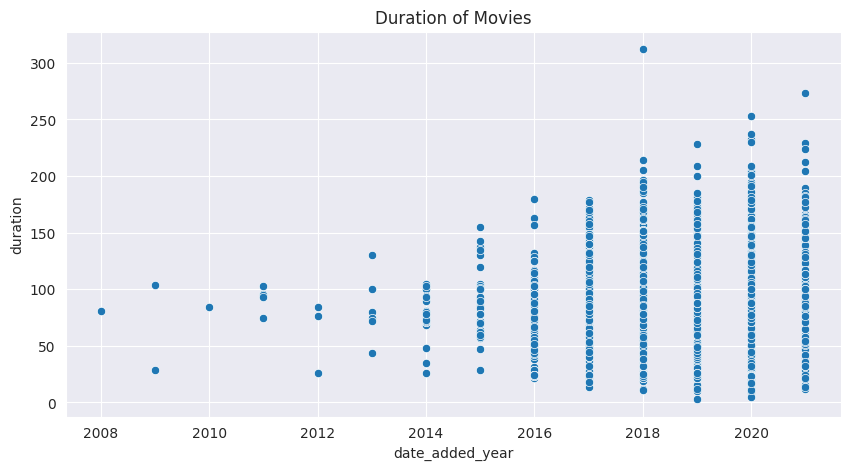

In [76]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=movies_df, x="date_added_year", y="duration");
plt.title("Duration of Movies");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- There appears to be both increase and decrease in movie duration over the years.

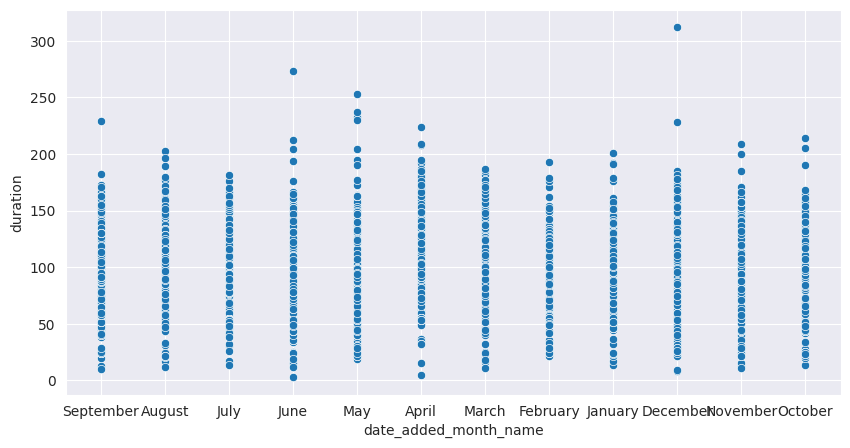

In [77]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=movies_df, x="date_added_month_name", y="duration");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- There seems to be no pattern of duration of movies wrt added month of the year

## <a id='toc1_3_'></a>[Recommendations](#toc0_)

### <a id='toc1_3_1_'></a>[General Recommendations](#toc0_)
Netflix is very popular in US with over 37% of content belonging to it. Because of this, it is important to focus on other countries having lesser content.  
By analyzing Netflix data, we have come up with following recommendations:
- Content should be released on platform during the month of July, December and January.
- Content should not be released during the month of February.
- More movies should be produced/added to Netflix as movies are more popular than TV shows. 
- Netflix should added more content in International movies, Dramas and Comedies genres.
- Movie timings should be around 120 minutes.
- TV shows should contain 1 season as these are more popular than shows having multiple season. 
- In Japan, South Korea and Taiwan, TV shows are more popular than movies. More TV shows should be produced in these countries.
- Movies should be added to Netflix within 1 year of release date.
- Netflix should add more of classic tv shows to their platform for catering to older audiences.


### <a id='toc1_3_2_'></a>[Content Recommendations](#toc0_)

In this analysis, we are going to look at improving business in countries that are in top 25 list excluding US. We will do this by ranking Genre, Cast, Rating and Director for each country.  
Netflix can use these ranking to determine the best content for each country.

In [78]:
filter_country_df = country_df.loc[country_df["country"].isin(improvement_countries)]

#### <a id='toc1_3_2_1_'></a>[Top genres for each country](#toc0_)

In [79]:
merge_df = df.merge(filter_country_df, on="show_id")
merge_df = merge_df.merge(listed_df, on="show_id")

In [80]:
gp=merge_df.groupby(["country","type","listed_in"])["show_id"].count().reset_index().rename(columns={"show_id":"count"})
gp["rank"]=gp.groupby(["country","type"])["count"].rank(method="first",ascending=False)
gp=gp.loc[gp["rank"] < 3].sort_values(by='country')
suggested_movie_genres =  gp.loc[(gp["type"]=='Movie')].sort_values(by=["country","rank"]).drop(["type","count"], axis=1)
suggested_tv_genres =  gp.loc[(gp["type"]=='TV Show')].sort_values(by=["country","rank"]).drop(["type","count"], axis=1)

In [81]:
pd.set_option('display.max_rows', None)
suggested_movie_genres.merge(suggested_tv_genres, on=['country','rank']).rename(columns={'listed_in_x':'Movie Genre', 'listed_in_y':'TV Genres'})

,country,Movie Genre,rank,TV Genres
0,Argentina,International Movies,1.0,Spanish-Language TV Shows
1,Argentina,Dramas,2.0,International TV Shows
2,Australia,Dramas,1.0,International TV Shows
3,Australia,International Movies,2.0,Kids' TV
4,Belgium,International Movies,1.0,International TV Shows
5,Belgium,Dramas,2.0,Crime TV Shows
6,Brazil,International Movies,1.0,International TV Shows
7,Brazil,Dramas,2.0,TV Dramas
8,Canada,Comedies,1.0,Kids' TV
9,Canada,Dramas,2.0,TV Dramas


<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Above table consist of top movie genre and tv genres in each country.
- Netflix can use this data to determine the most popular genre in each country.  
for eg: Australians like **Drama** movies and **International TV Shows** 

#### <a id='toc1_3_2_2_'></a>[Top rated content for each country](#toc0_)

In [82]:
gp=merge_df.groupby(["country","type","rating"])["show_id"].count().reset_index().rename(columns={"show_id":"count"})
gp["rank"]=gp.groupby(["country","type"])["count"].rank(method="first",ascending=False)
gp=gp.loc[gp["rank"] < 3].sort_values(by='country')
suggested_tv_ratings =  gp.loc[(gp["type"]=='TV Show')].sort_values(by=["country","rank"]).drop(["count","type"], axis=1)
suggested_movie_ratings =  gp.loc[(gp["type"]=='Movie')].sort_values(by=["country","rank"]).drop(["count","type"], axis=1)

In [83]:
suggested_movie_ratings.merge(suggested_tv_ratings, on=['country','rank']).rename(columns={'rating_x':'Movie Rating', 'rating_y':'TV Rating'})

,country,Movie Rating,rank,TV Rating
0,Argentina,TV-MA,1.0,TV-MA
1,Argentina,TV-14,2.0,TV-14
2,Australia,R,1.0,TV-MA
3,Australia,TV-MA,2.0,TV-PG
4,Belgium,TV-MA,1.0,TV-MA
5,Belgium,R,2.0,TV-14
6,Brazil,TV-MA,1.0,TV-MA
7,Brazil,TV-14,2.0,TV-PG
8,Canada,R,1.0,TV-MA
9,Canada,TV-MA,2.0,TV-14


<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Above table shows top movie and tv ratings in each country.
- Netflix can use this data to predict what type of content users want to watch. 
- For example, Japan likes TV-M movies and TV-14 rated TV shows. This shows that most of the tv users here under the age of 14.

#### <a id='toc1_3_2_3_'></a>[Top cast in each country](#toc0_)

In [84]:
pd.reset_option('display.max_rows')

In [85]:
merge_df = df.merge(filter_country_df, on="show_id")
merge_df = merge_df.merge(cast_df, on="show_id")
merge_df=merge_df.loc[merge_df["cast"] != "Unknown"]
gp=merge_df.groupby(["country","type","cast"])["show_id"].count().reset_index().rename(columns={"show_id":"count"})
gp["rank"]=gp.groupby(["country","type"])["count"].rank(method="first",ascending=False)
gp=gp.loc[gp["rank"] < 3].sort_values(by='country')
suggested_movie_cast =  gp.loc[(gp["type"]=='Movie')].sort_values(by=["country","rank"]).drop(["type","count"], axis=1)
suggested_tv_cast =  gp.loc[(gp["type"]=='TV Show')].sort_values(by=["country","rank"]).drop(["count","type"], axis=1)

In [86]:
pd.set_option('display.max_rows', None)
suggested_movie_cast.merge(suggested_tv_cast, on=['country','rank']).rename(columns={'cast_x':'Movie Cast', 'cast_y':'TV Cast'})

,country,Movie Cast,rank,TV Cast
0,Argentina,Andrea Frigerio,1.0,Chino Darín
1,Argentina,Joaquín Furriel,2.0,Fabio Aste
2,Australia,Sam Neill,1.0,Alex Dimitriades
3,Australia,Emily Morris,2.0,Danielle Cormack
4,Belgium,Matthias Schoenaerts,1.0,Charlotte Timmers
5,Belgium,Bérénice Bejo,2.0,Jeroen Perceval
6,Brazil,Dalton Vigh,1.0,Jonathan Haagensen
7,Brazil,Eduardo Galvão,2.0,Wallie Ruy
8,Canada,John Paul Tremblay,1.0,Ashleigh Ball
9,Canada,Robb Wells,2.0,Vincent Tong


<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Above table shows which cast is the most popular in each country.
- Netflix can use this data to predict what type of content users want to watch.
- Using these casts, Netflix can produce their original content and distribute in their respective countries.

#### <a id='toc1_3_2_4_'></a>[Top directors in each country](#toc0_)

In [87]:
merge_df = df.merge(filter_country_df, on="show_id")
merge_df = merge_df.merge(director_df, on="show_id")
merge_df=merge_df.loc[merge_df["director"] != "Unknown"]
gp=merge_df.groupby(["country","type","director"])["show_id"].count().reset_index().rename(columns={"show_id":"count"})
gp=gp.loc[gp["count"] > 0]
gp["rank"]=gp.groupby(["country","type"])["count"].rank(method="first",ascending=False)
gp=gp.loc[gp["rank"] < 3].sort_values(by='country')
suggested_movie_director =  gp.loc[(gp["type"]=='Movie')].sort_values(by=["country","rank"]).drop(["type","count"], axis=1)
suggested_tv_director =  gp.loc[(gp["type"]=='TV Show')].sort_values(by=["country","rank"]).drop(["count","type"], axis=1)

In [88]:
pd.set_option('display.max_rows', None)
suggested_movie_director.merge(suggested_tv_director, on=['country','rank'], how="left")\
.rename(columns={'director_x':'Movie Director', 'director_y':'TV Director'})\
.replace(np.nan, '', regex=True)

,country,Movie Director,rank,TV Director
0,Argentina,Jan Suter,1.0,Alejandro Hartmann
1,Argentina,Raúl Campos,2.0,Hernán Guerschuny
2,Australia,Clay Glen,1.0,Mat King
3,Australia,Jane Campion,2.0,
4,Belgium,Jalil Lespert,1.0,Alain Brunard
5,Belgium,Lars von Trier,2.0,Wouter Bouvijn
6,Brazil,Diego Pignataro,1.0,Andrucha Waddington
7,Brazil,Lucas Margutti,2.0,Carla Barros
8,Canada,Justin G. Dyck,1.0,Alastair Fothergill
9,Canada,Mike Clattenburg,2.0,Gary Howsam


<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Above table shows which director is the most popular in each country.
- Netflix can use this data to predict what type of content users want to watch.
- Using these directors, Netflix can produce their original content and distribute in their respective countries.